In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.1.1
matplotlib.pyplot 3.1.1
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/30/2020       Albany             39                            1204   
1  04/30/2020     Allegany              0                              35   
2  04/30/2020        Bronx            541                           37785   
3  04/30/2020       Broome             15                             299   
4  04/30/2020  Cattaraugus              2                              49   
5  04/30/2020       Cayuga              3                              51   
6  04/30/2020   Chautauqua              2                              35   
7  04/30/2020      Chemung              1                             123   
8  04/30/2020     Chenango              1                              99   
9  04/30/2020      Clinton              2                              61   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              378                                 10688  
1                               20                                   563  
2                             2824                                 93055  
3                              110                                  2471  
4                               78                                   987  
5                               28                                   985  
6                               47                                  1207  
7                               54                                  1617  
8                               21                                   810  
9                               48                                   796

In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 52,274                           | 124,378                                |
|  1 | Kings       | 45,519                           | 115,417                                |
|  2 | Bronx       | 37,785                           | 93,055                                 |
|  3 | Nassau      | 36,161                           | 97,308                                 |
|  4 | Suffolk     | 34,037                           | 93,568                                 |
|  5 | Westchester | 29,232                           | 94,442                                 |
|  6 | New York    | 22,175                           | 68,807                                 |
|  7 | Richmond    | 11,937                           | 34,335                                 |
|  8 | Rockland    | 11,812   

In [6]:
covid_19_nys_data.shape

(3720, 6)

# Saving source .csv data

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/30/2020.


In [8]:
covid_19_nys_data.to_csv('data/covid_19_nys_data', index=False)

In [9]:
current_date = covid_19_nys_data.sort_values(by='Test Date', ascending=False)['Test Date'].iloc[0]

In [10]:
current_date

'04/30/2020'

# Begin Analysis

In [11]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/30/2020       Albany             39                            1204   
1  04/30/2020     Allegany              0                              35   
2  04/30/2020        Bronx            541                           37785   
3  04/30/2020       Broome             15                             299   
4  04/30/2020  Cattaraugus              2                              49   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              378                                 10688  
1                               20                                   563  
2                             2824                                 93055  
3                              110                                  2471  
4                               78                                   987

In [12]:
covid_19_nys_data.tail()

Test Date       County  New Positives  Cumulative Number of Positives  \
3715  03/02/2020   Washington              0                               0   
3716  03/02/2020        Wayne              0                               0   
3717  03/02/2020  Westchester              1                               1   
3718  03/02/2020      Wyoming              0                               0   
3719  03/02/2020        Yates              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
3715                                0                                     0  
3716                                0                                     0  
3717                                1                                     1  
3718                                0                                     0  
3719                                0                                     0

In [13]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [14]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [15]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             3720 non-null   object
 1   County                                3720 non-null   object
 2   New Positives                         3720 non-null   int64 
 3   Cumulative Number of Positives        3720 non-null   int64 
 4   Total Number of Tests Performed       3720 non-null   int64 
 5   Cumulative Number of Tests Performed  3720 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 174.5+ KB


In [16]:
covid_19_nys_data.describe()

New Positives  Cumulative Number of Positives  \
count    3720.000000                     3720.000000   
mean       82.880108                     1880.088978   
std       258.860887                     6548.684995   
min         0.000000                        0.000000   
25%         0.000000                        1.000000   
50%         1.000000                       24.000000   
75%         9.000000                      129.250000   
max      2663.000000                    52274.000000   

       Total Number of Tests Performed  Cumulative Number of Tests Performed  
count                      3720.000000                           3720.000000  
mean                        249.311290                           5023.833871  
std                         663.348446                          15363.567096  
min                           0.000000                              0.000000  
25%                           3.000000                             20.000000  
50%                          17.000000                            307.000000  
75%                          82.000000                           1289.250000  
max                        5951.000000                         124378.000000

In [17]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [18]:
covid_19_nys_data.isnull().sum().sum()

0

In [19]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/30/2020       Albany             39                            1204   
1  04/30/2020     Allegany              0                              35   
2  04/30/2020        Bronx            541                           37785   
3  04/30/2020       Broome             15                             299   
4  04/30/2020  Cattaraugus              2                              49   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              378                                 10688  
1                               20                                   563  
2                             2824                                 93055  
3                              110                                  2471  
4                               78                                   987

In [20]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [21]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [22]:
epi_curve = covid_19_nys_data.sort_values(by='Test Date')

In [23]:
epi_curve = epi_curve.groupby(by='Test Date')['New Positives'].sum().reset_index()

In [24]:
epi_curve['NewDate'] = epi_curve['Test Date'].dt.strftime("%m-%d")

In [25]:
epi_curve

Test Date  New Positives NewDate
0  2020-03-02              1   03-02
1  2020-03-03              0   03-03
2  2020-03-04              2   03-04
3  2020-03-05             22   03-05
4  2020-03-06             11   03-06
5  2020-03-07             24   03-07
6  2020-03-08             28   03-08
7  2020-03-09             63   03-09
8  2020-03-10             44   03-10
9  2020-03-11             56   03-11
10 2020-03-12            102   03-12
11 2020-03-13            164   03-13
12 2020-03-14            131   03-14
13 2020-03-15            294   03-15
14 2020-03-16            432   03-16
15 2020-03-17           1009   03-17
16 2020-03-18           1769   03-18
17 2020-03-19           2950   03-19
18 2020-03-20           3254   03-20
19 2020-03-21           4812   03-21
20 2020-03-22           5707   03-22
21 2020-03-23           4790   03-23
22 2020-03-24           5145   03-24
23 2020-03-25           6448   03-25
24 2020-03-26           7379   03-26
25 2020-03-27           7681   03-27
26 2020-03-28           7195   03-28
27 2020-03-29           6984   03-29
28 2020-03-30           9298   03-30
29 2020-03-31           7917   03-31
30 2020-04-01           8669   04-01
31 2020-04-02          10482   04-02
32 2020-04-03          10841   04-03
33 2020-04-04           8327   04-04
34 2020-04-05           8658   04-05
35 2020-04-06           8174   04-06
36 2020-04-07          10453   04-07
37 2020-04-08          10621   04-08
38 2020-04-09          10575   04-09
39 2020-04-10           9946   04-10
40 2020-04-11           8236   04-11
41 2020-04-12           6337   04-12
42 2020-04-13           7177   04-13
43 2020-04-14          11571   04-14
44 2020-04-15           8505   04-15
45 2020-04-16           7358   04-16
46 2020-04-17           7090   04-17
47 2020-04-18           6054   04-18
48 2020-04-19           4726   04-19
49 2020-04-20           4178   04-20
50 2020-04-21           5526   04-21
51 2020-04-22           6244   04-22
52 2020-04-23           8130   04-23
53 2020-04-24          10553   04-24
54 2020-04-25           5902   04-25
55 2020-04-26           3951   04-26
56 2020-04-27           3110   04-27
57 2020-04-28           4585   04-28
58 2020-04-29           4681   04-29
59 2020-04-30           3942   04-30

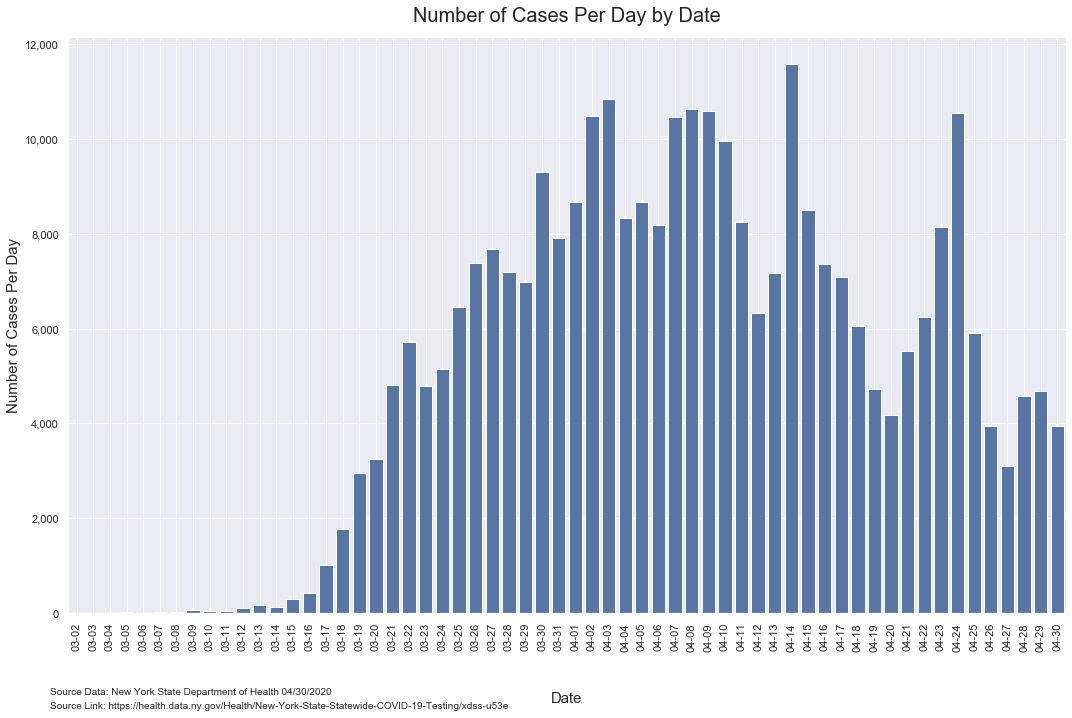

In [26]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [27]:
epi_curve['3_day_rolling_average'] = epi_curve['New Positives'].rolling(3).mean()

In [28]:
epi_curve

Test Date  New Positives NewDate  3_day_rolling_average
0  2020-03-02              1   03-02                    NaN
1  2020-03-03              0   03-03                    NaN
2  2020-03-04              2   03-04               1.000000
3  2020-03-05             22   03-05               8.000000
4  2020-03-06             11   03-06              11.666667
5  2020-03-07             24   03-07              19.000000
6  2020-03-08             28   03-08              21.000000
7  2020-03-09             63   03-09              38.333333
8  2020-03-10             44   03-10              45.000000
9  2020-03-11             56   03-11              54.333333
10 2020-03-12            102   03-12              67.333333
11 2020-03-13            164   03-13             107.333333
12 2020-03-14            131   03-14             132.333333
13 2020-03-15            294   03-15             196.333333
14 2020-03-16            432   03-16             285.666667
15 2020-03-17           1009   03-17             578.333333
16 2020-03-18           1769   03-18            1070.000000
17 2020-03-19           2950   03-19            1909.333333
18 2020-03-20           3254   03-20            2657.666667
19 2020-03-21           4812   03-21            3672.000000
20 2020-03-22           5707   03-22            4591.000000
21 2020-03-23           4790   03-23            5103.000000
22 2020-03-24           5145   03-24            5214.000000
23 2020-03-25           6448   03-25            5461.000000
24 2020-03-26           7379   03-26            6324.000000
25 2020-03-27           7681   03-27            7169.333333
26 2020-03-28           7195   03-28            7418.333333
27 2020-03-29           6984   03-29            7286.666667
28 2020-03-30           9298   03-30            7825.666667
29 2020-03-31           7917   03-31            8066.333333
30 2020-04-01           8669   04-01            8628.000000
31 2020-04-02          10482   04-02            9022.666667
32 2020-04-03          10841   04-03            9997.333333
33 2020-04-04           8327   04-04            9883.333333
34 2020-04-05           8658   04-05            9275.333333
35 2020-04-06           8174   04-06            8386.333333
36 2020-04-07          10453   04-07            9095.000000
37 2020-04-08          10621   04-08            9749.333333
38 2020-04-09          10575   04-09           10549.666667
39 2020-04-10           9946   04-10           10380.666667
40 2020-04-11           8236   04-11            9585.666667
41 2020-04-12           6337   04-12            8173.000000
42 2020-04-13           7177   04-13            7250.000000
43 2020-04-14          11571   04-14            8361.666667
44 2020-04-15           8505   04-15            9084.333333
45 2020-04-16           7358   04-16            9144.666667
46 2020-04-17           7090   04-17            7651.000000
47 2020-04-18           6054   04-18            6834.000000
48 2020-04-19           4726   04-19            5956.666667
49 2020-04-20           4178   04-20            4986.000000
50 2020-04-21           5526   04-21            4810.000000
51 2020-04-22           6244   04-22            5316.000000
52 2020-04-23           8130   04-23            6633.333333
53 2020-04-24          10553   04-24            8309.000000
54 2020-04-25           5902   04-25            8195.000000
55 2020-04-26           3951   04-26            6802.000000
56 2020-04-27           3110   04-27            4321.000000
57 2020-04-28           4585   04-28            3882.000000
58 2020-04-29           4681   04-29            4125.333333
59 2020-04-30           3942   04-30            4402.666667

In [29]:
epi_curve['3_day_rolling_average'].fillna(0, inplace=True)

In [30]:
epi_curve.head()

Test Date  New Positives NewDate  3_day_rolling_average
0 2020-03-02              1   03-02               0.000000
1 2020-03-03              0   03-03               0.000000
2 2020-03-04              2   03-04               1.000000
3 2020-03-05             22   03-05               8.000000
4 2020-03-06             11   03-06              11.666667

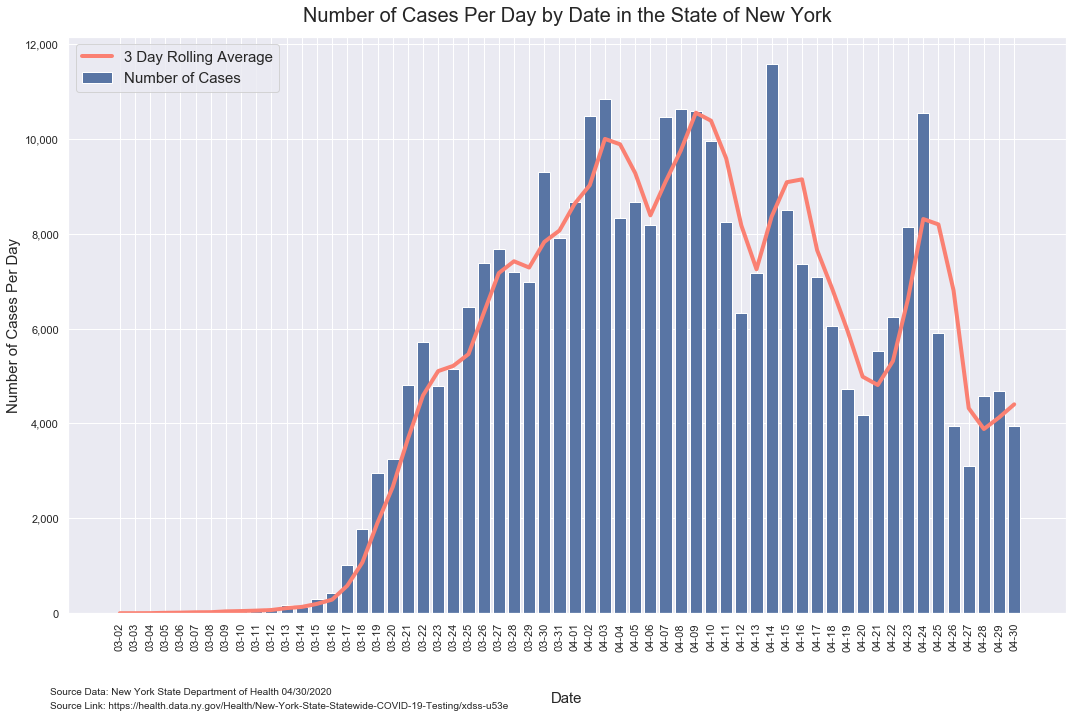

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve,
            label = 'Number of Cases')

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=epi_curve, 
            linewidth=4,
            label = '3 Day Rolling Average')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date in the State of New York', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve')

In [32]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-30       Albany             39                            1204   
1 2020-04-30     Allegany              0                              35   
2 2020-04-30        Bronx            541                           37785   
3 2020-04-30       Broome             15                             299   
4 2020-04-30  Cattaraugus              2                              49   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              378                                 10688  
1                               20                                   563  
2                             2824                                 93055  
3                              110                                  2471  
4                               78                                   987

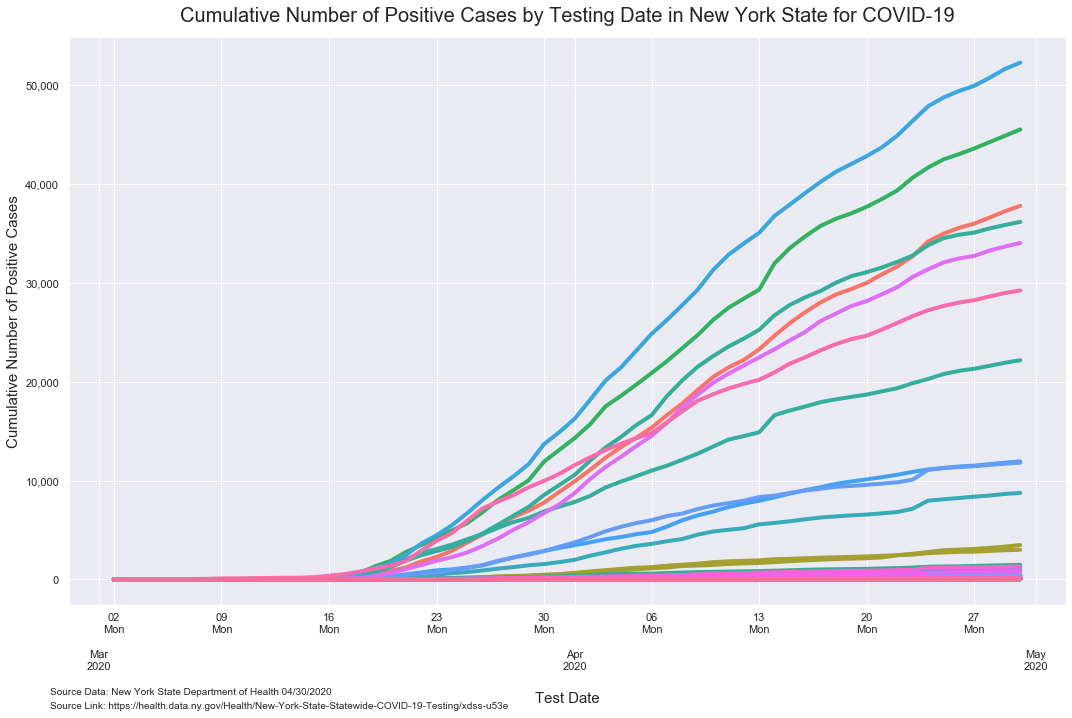

In [33]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

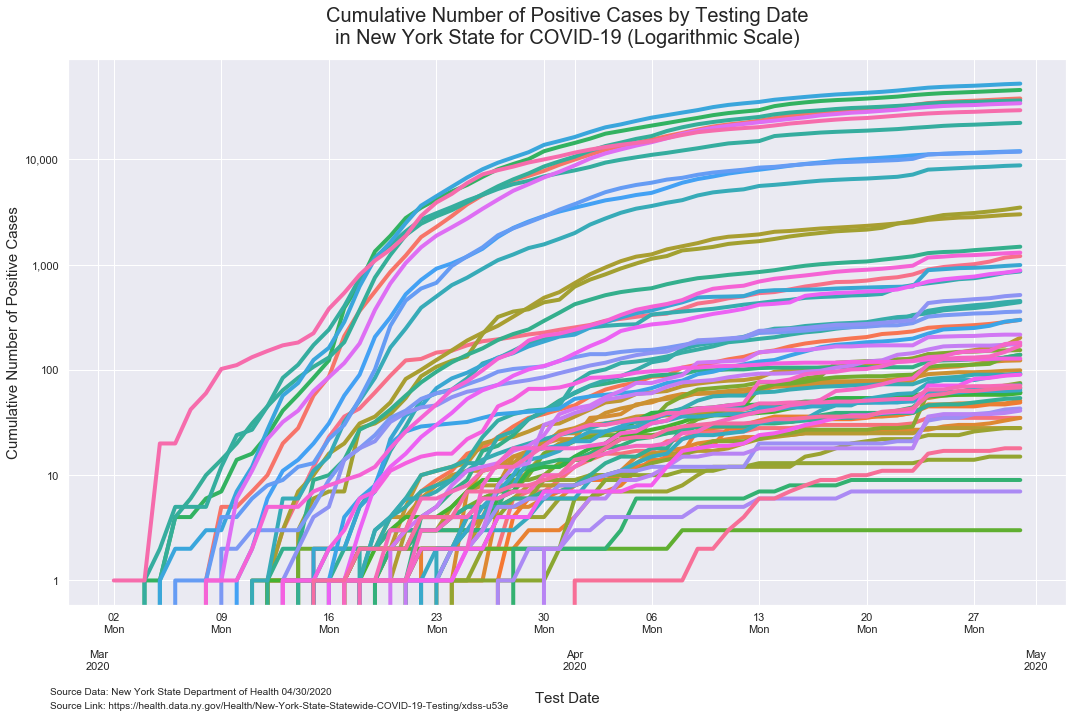

In [34]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [35]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

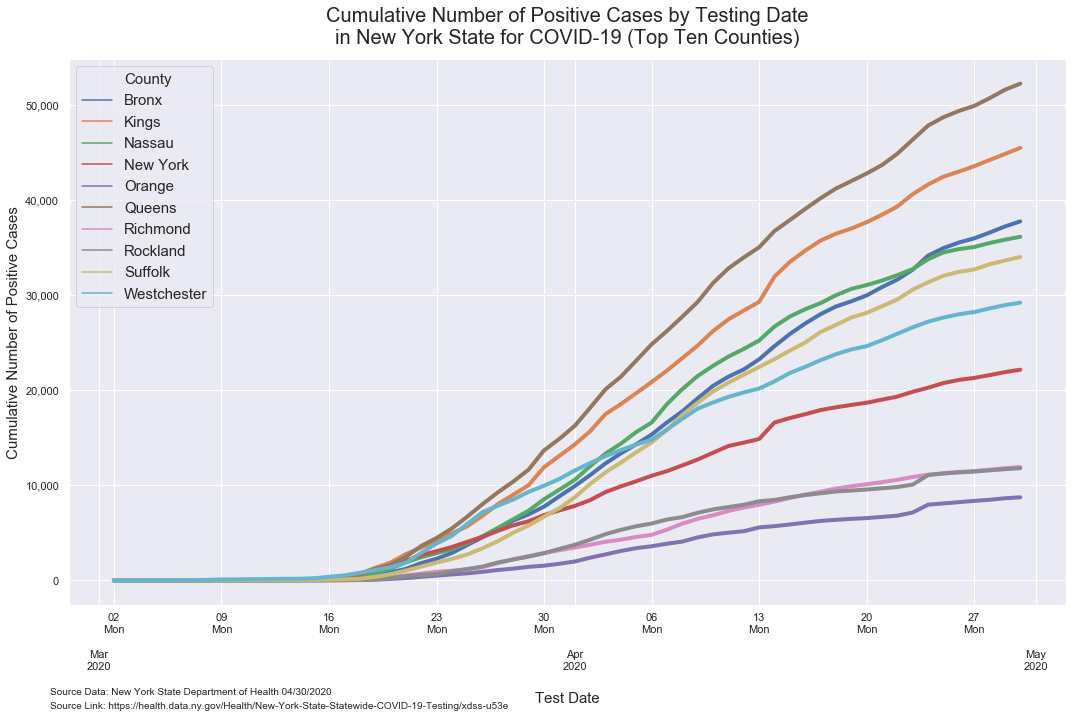

In [36]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

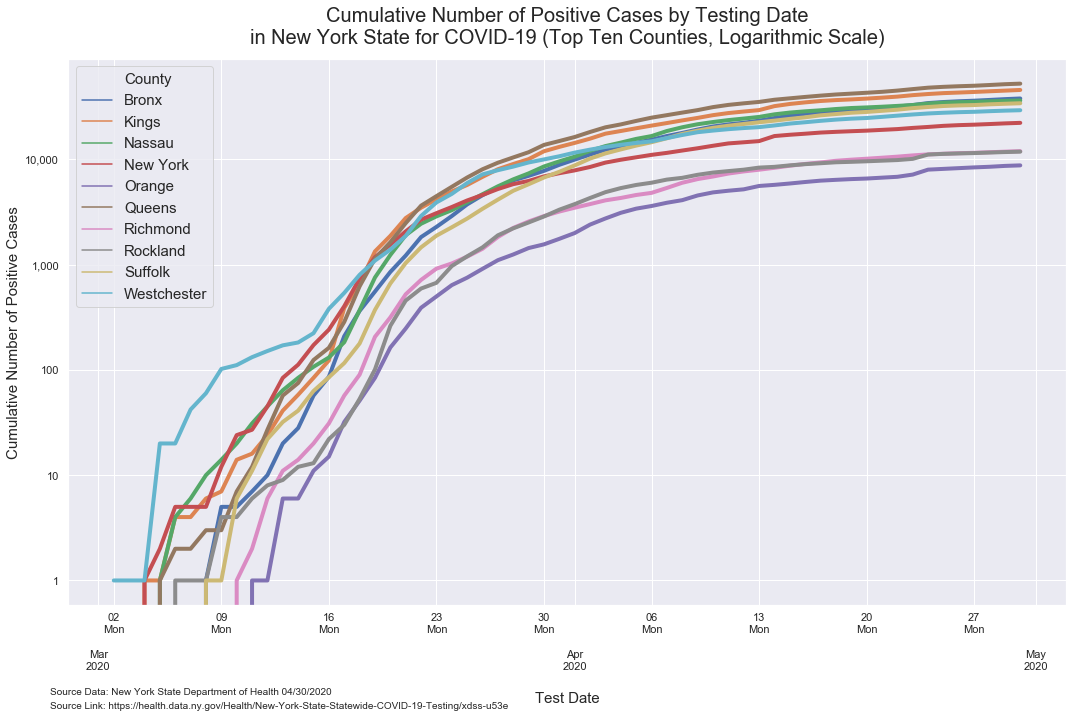

In [37]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [38]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [39]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [40]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [41]:
from_ten_cases

County ten_cases_date
0    Westchester     2020-03-05
1         Nassau     2020-03-08
2       New York     2020-03-09
3          Kings     2020-03-10
4        Suffolk     2020-03-11
5         Queens     2020-03-11
6          Bronx     2020-03-12
7       Richmond     2020-03-13
8       Rockland     2020-03-14
9       Dutchess     2020-03-15
10        Orange     2020-03-15
11        Albany     2020-03-15
12        Monroe     2020-03-16
13      Saratoga     2020-03-17
14   Schenectady     2020-03-17
15        Ulster     2020-03-18
16          Erie     2020-03-18
17      Tompkins     2020-03-20
18      Sullivan     2020-03-20
19      Onondaga     2020-03-20
20    Rensselaer     2020-03-20
21        Putnam     2020-03-20
22      Columbia     2020-03-22
23       Niagara     2020-03-22
24       Clinton     2020-03-24
25        Broome     2020-03-24
26       Ontario     2020-03-25
27       Steuben     2020-03-25
28        Oneida     2020-03-25
29       Chemung     2020-03-26
30         Wayne     2020-03-26
31       Madison     2020-03-26
32        Warren     2020-03-27
33      Herkimer     2020-03-28
34    Livingston     2020-03-28
35        Otsego     2020-03-28
36  St. Lawrence     2020-03-28
37      Chenango     2020-03-28
38        Greene     2020-03-29
39      Delaware     2020-03-29
40     Jefferson     2020-03-29
41        Oswego     2020-03-29
42       Genesee     2020-03-30
43    Washington     2020-03-30
44       Wyoming     2020-03-31
45      Allegany     2020-04-01
46      Cortland     2020-04-02
47      Franklin     2020-04-02
48    Montgomery     2020-04-02
49    Chautauqua     2020-04-03
50       Orleans     2020-04-03
51     Schoharie     2020-04-03
52   Cattaraugus     2020-04-04
53        Cayuga     2020-04-05
54        Fulton     2020-04-05
55        Seneca     2020-04-06
56         Tioga     2020-04-07
57         Essex     2020-04-09
58         Yates     2020-04-19

In [42]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [43]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [44]:
from_ten_cases

Test Date  County  New Positives  Cumulative Number of Positives  \
0    2020-04-30  Albany             39                            1204   
1    2020-04-29  Albany             98                            1165   
2    2020-04-28  Albany             58                            1067   
3    2020-04-27  Albany             30                            1009   
4    2020-04-26  Albany             31                             979   
...         ...     ...            ...                             ...   
3487 2020-04-23   Yates              0                              11   
3488 2020-04-22   Yates              0                              11   
3489 2020-04-21   Yates              1                              11   
3490 2020-04-20   Yates              0                              10   
3491 2020-04-19   Yates              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 378                                 10688   
1                                 439                                 10310   
2                                 351                                  9871   
3                                 197                                  9520   
4                                 263                                  9323   
...                               ...                                   ...   
3487                                5                                   193   
3488                                8                                   188   
3489                                1                                   180   
3490                                1                                   179   
3491                               13                                   178   

     ten_cases_date  
0        2020-03-15  
1        2020-03-15  
2        2020-03-15  
3        2020-03-15  
4        2020-03-15  
...             ...  
3487     2020-04-19  
3488     2020-04-19  
3489     2020-04-19  
3490     2020-04-19  
3491     2020-04-19  

[2210 rows x 7 columns]

In [45]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                       from_ten_cases['ten_cases_date']).dt.days

In [46]:
from_ten_cases

Test Date  County  New Positives  Cumulative Number of Positives  \
0    2020-04-30  Albany             39                            1204   
1    2020-04-29  Albany             98                            1165   
2    2020-04-28  Albany             58                            1067   
3    2020-04-27  Albany             30                            1009   
4    2020-04-26  Albany             31                             979   
...         ...     ...            ...                             ...   
3487 2020-04-23   Yates              0                              11   
3488 2020-04-22   Yates              0                              11   
3489 2020-04-21   Yates              1                              11   
3490 2020-04-20   Yates              0                              10   
3491 2020-04-19   Yates              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 378                                 10688   
1                                 439                                 10310   
2                                 351                                  9871   
3                                 197                                  9520   
4                                 263                                  9323   
...                               ...                                   ...   
3487                                5                                   193   
3488                                8                                   188   
3489                                1                                   180   
3490                                1                                   179   
3491                               13                                   178   

     ten_cases_date  days_from_10_cases  
0        2020-03-15                  46  
1        2020-03-15                  45  
2        2020-03-15                  44  
3        2020-03-15                  43  
4        2020-03-15                  42  
...             ...                 ...  
3487     2020-04-19                   4  
3488     2020-04-19                   3  
3489     2020-04-19                   2  
3490     2020-04-19                   1  
3491     2020-04-19                   0  

[2210 rows x 8 columns]

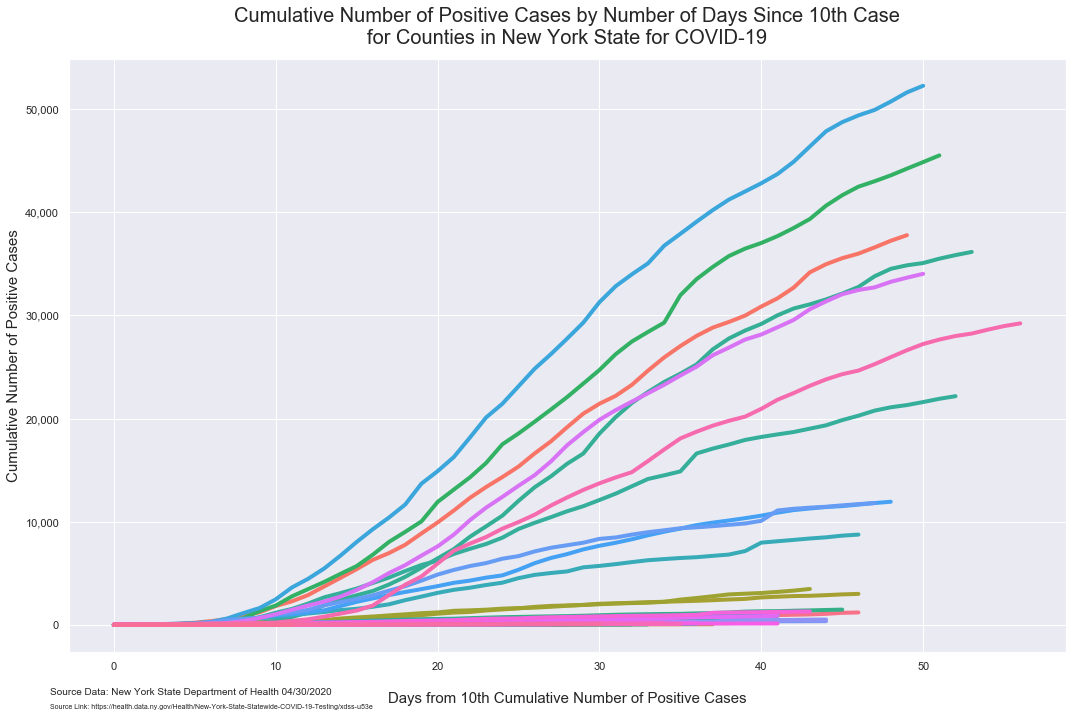

In [47]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

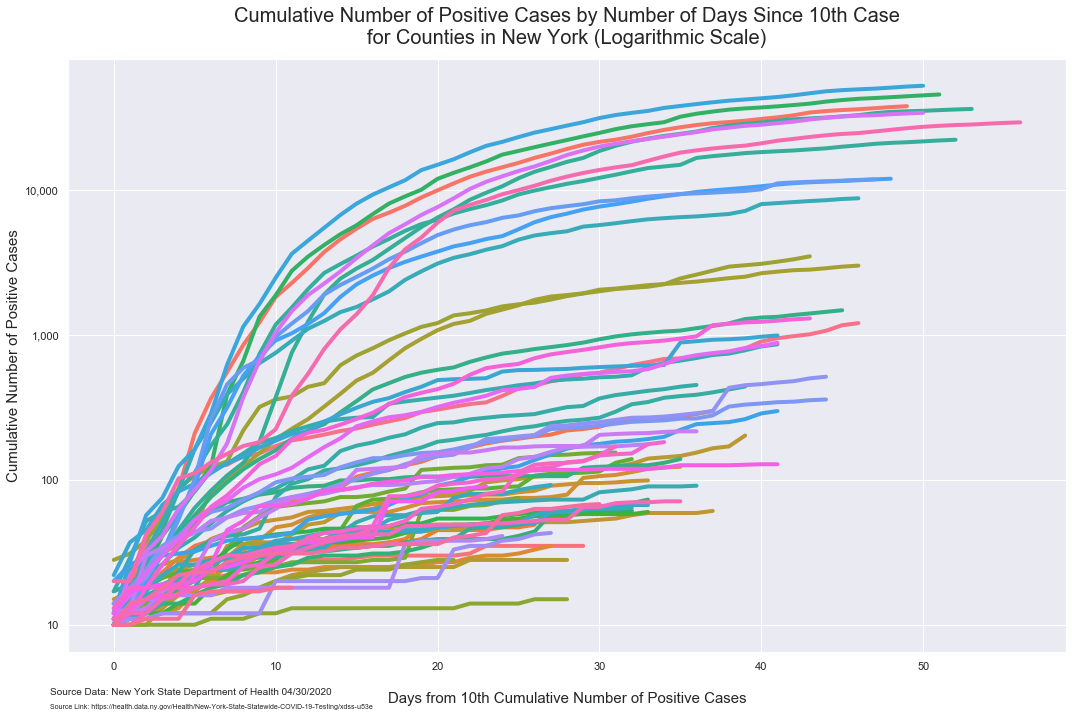

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [49]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

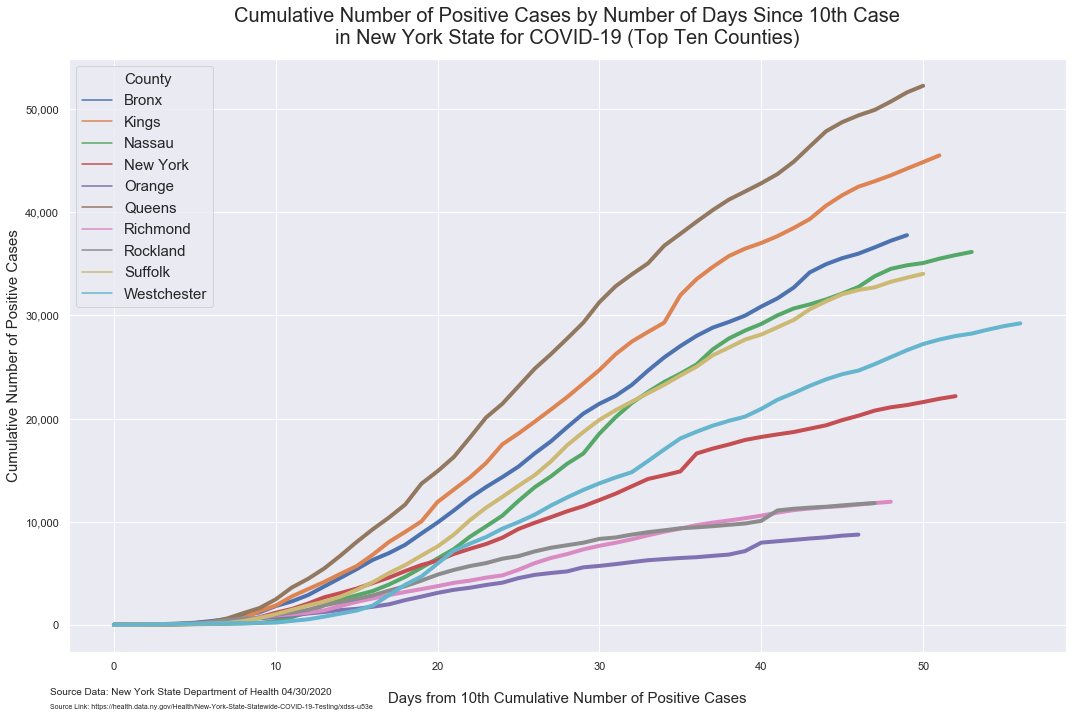

In [50]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

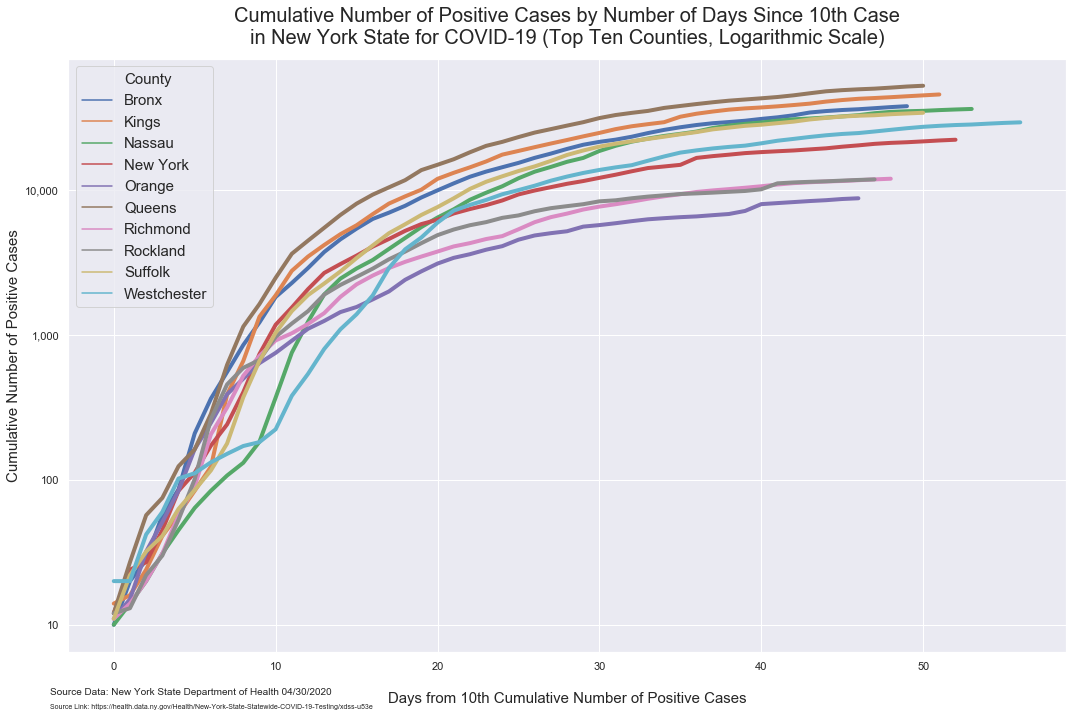

In [51]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

In [52]:
from_ten_cases_top_10.head()

Test Date County  New Positives  Cumulative Number of Positives  \
120 2020-04-30  Bronx            541                           37785   
121 2020-04-29  Bronx            644                           37244   
122 2020-04-28  Bronx            606                           36600   
123 2020-04-27  Bronx            438                           35994   
124 2020-04-26  Bronx            586                           35556   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
120                             2824                                 93055   
121                             2977                                 90231   
122                             2938                                 87254   
123                             2107                                 84316   
124                             2363                                 82209   

    ten_cases_date  days_from_10_cases  
120     2020-03-12                  49  
121     2020-03-12                  48  
122     2020-03-12                  47  
123     2020-03-12                  46  
124     2020-03-12                  45

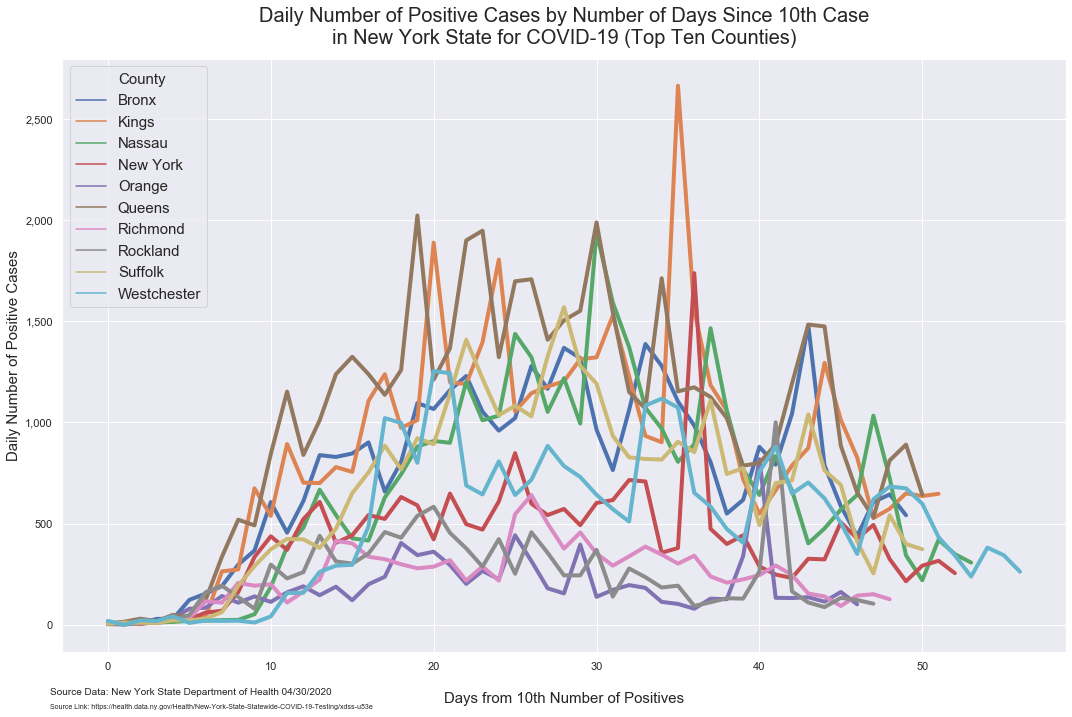

In [53]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [54]:
from_ten_cases_top_10['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0]

3415    0
Name: New Positives, dtype: int64

In [55]:
temp_fill_zeros = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0] = 1

temp_fill_zeros

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Test Date       County  New Positives  Cumulative Number of Positives  \
169  2020-03-12        Bronx              3                              10   
168  2020-03-13        Bronx             10                              20   
167  2020-03-14        Bronx              8                              28   
166  2020-03-15        Bronx             29                              57   
165  2020-03-16        Bronx             29                              86   
...         ...          ...            ...                             ...   
3364 2020-04-26  Westchester            343                           28007   
3363 2020-04-27  Westchester            238                           28245   
3362 2020-04-28  Westchester            381                           28626   
3361 2020-04-29  Westchester            344                           28970   
3360 2020-04-30  Westchester            262                           29232   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
169                                36                                   190   
168                                99                                   289   
167                                80                                   369   
166                               116                                   485   
165                               151                                   636   
...                               ...                                   ...   
3364                             1764                                 87736   
3363                             1408                                 89144   
3362                             1843                                 90987   
3361                             1842                                 92829   
3360                             1613                                 94442   

     ten_cases_date  days_from_10_cases  
169      2020-03-12                   0  
168      2020-03-12                   1  
167      2020-03-12                   2  
166      2020-03-12                   3  
165      2020-03-12                   4  
...             ...                 ...  
3364     2020-03-05                  52  
3363     2020-03-05                  53  
3362     2020-03-05                  54  
3361     2020-03-05                  55  
3360     2020-03-05                  56  

[512 rows x 8 columns]

In [56]:
temp_fill_zeros[['County', 'New Positives', 'days_from_10_cases']].loc[from_ten_cases_top_10['County'] == 'Westchester']

County  New Positives  days_from_10_cases
3416  Westchester             19                   0
3415  Westchester              1                   1
3414  Westchester             22                   2
3413  Westchester             18                   3
3412  Westchester             42                   4
3411  Westchester              9                   5
3410  Westchester             21                   6
3409  Westchester             19                   7
3408  Westchester             20                   8
3407  Westchester             11                   9
3406  Westchester             41                  10
3405  Westchester            157                  11
3404  Westchester            158                  12
3403  Westchester            261                  13
3402  Westchester            292                  14
3401  Westchester            296                  15
3400  Westchester            486                  16
3399  Westchester           1021                  17
3398  Westchester            997                  18
3397  Westchester            800                  19
3396  Westchester           1253                  20
3395  Westchester           1243                  21
3394  Westchester            688                  22
3393  Westchester            644                  23
3392  Westchester            807                  24
3391  Westchester            641                  25
3390  Westchester            716                  26
3389  Westchester            884                  27
3388  Westchester            784                  28
3387  Westchester            730                  29
3386  Westchester            642                  30
3385  Westchester            571                  31
3384  Westchester            510                  32
3383  Westchester           1083                  33
3382  Westchester           1117                  34
3381  Westchester           1073                  35
3380  Westchester            652                  36
3379  Westchester            584                  37
3378  Westchester            473                  38
3377  Westchester            405                  39
3376  Westchester            756                  40
3375  Westchester            881                  41
3374  Westchester            648                  42
3373  Westchester            703                  43
3372  Westchester            624                  44
3371  Westchester            503                  45
3370  Westchester            350                  46
3369  Westchester            620                  47
3368  Westchester            683                  48
3367  Westchester            674                  49
3366  Westchester            598                  50
3365  Westchester            433                  51
3364  Westchester            343                  52
3363  Westchester            238                  53
3362  Westchester            381                  54
3361  Westchester            344                  55
3360  Westchester            262                  56

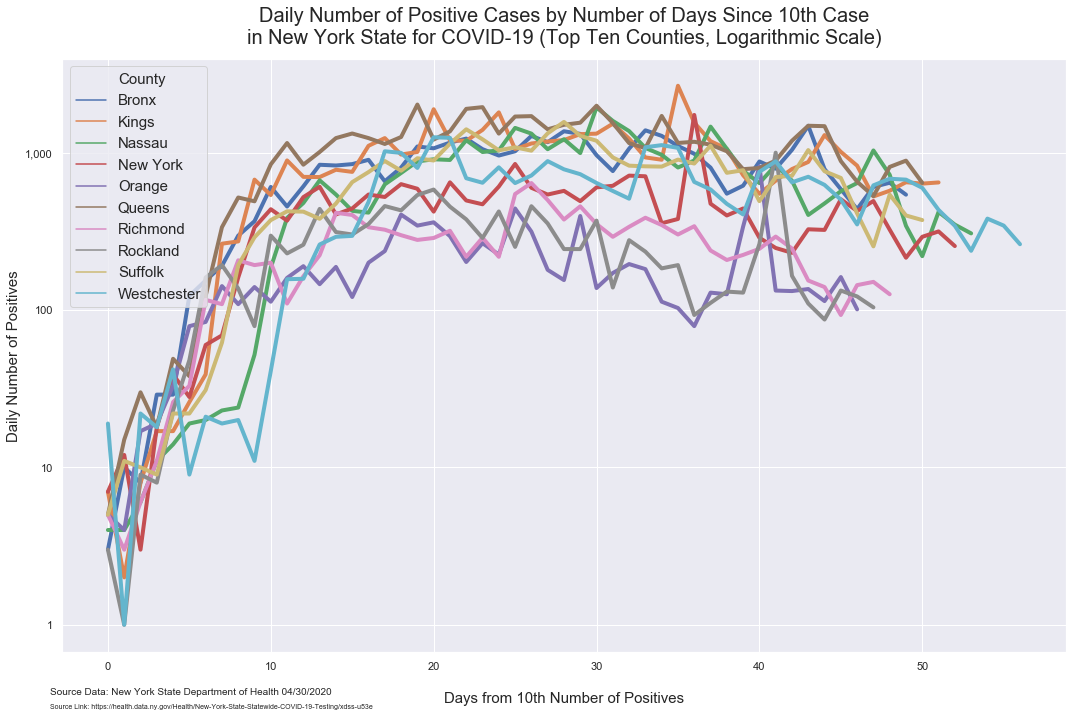

In [57]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [58]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                                ascending=[True, True, True])

In [59]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [60]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [61]:
from_ten_cases_top_10_weekly

County  Test Date  days_from_10_cases  New Positives Weekly Average
0         Bronx 2020-03-15                   3                     12.500000
1         Bronx 2020-03-22                  10                    252.428571
2         Bronx 2020-03-29                  17                    734.000000
3         Bronx 2020-04-05                  24                   1052.142857
4         Bronx 2020-04-12                  31                   1125.428571
..          ...        ...                 ...                           ...
77  Westchester 2020-04-05                  31                    709.714286
78  Westchester 2020-04-12                  38                    784.571429
79  Westchester 2020-04-19                  45                    645.714286
80  Westchester 2020-04-26                  52                    528.714286
81  Westchester 2020-05-03                  56                    306.250000

[82 rows x 4 columns]

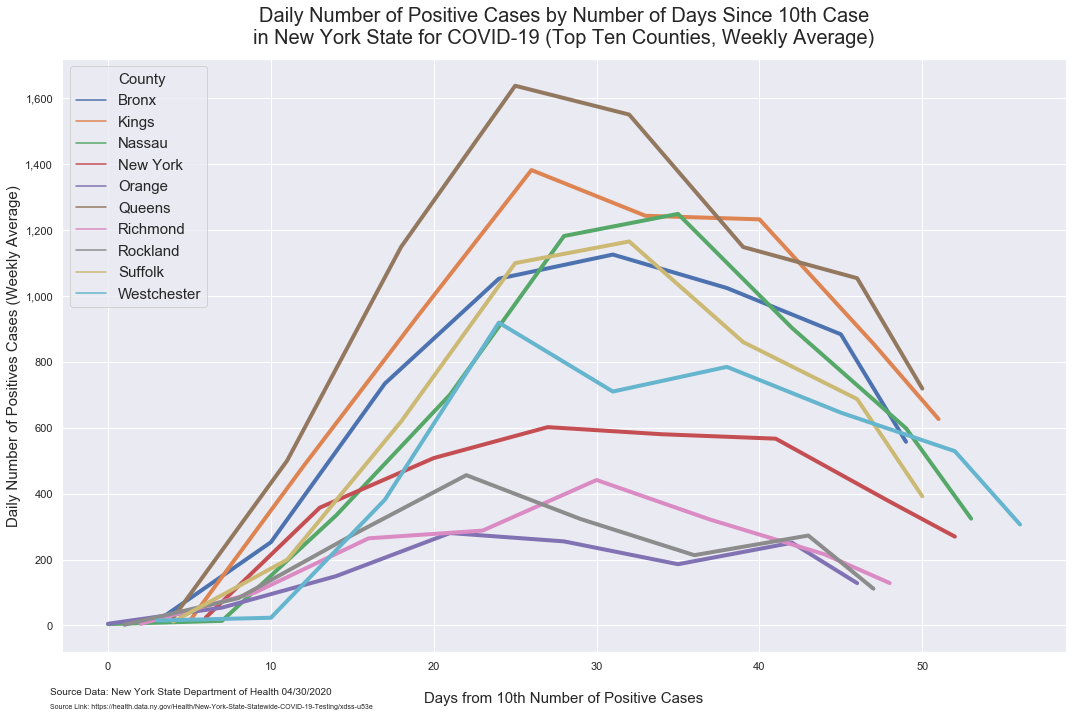

In [62]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positives Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

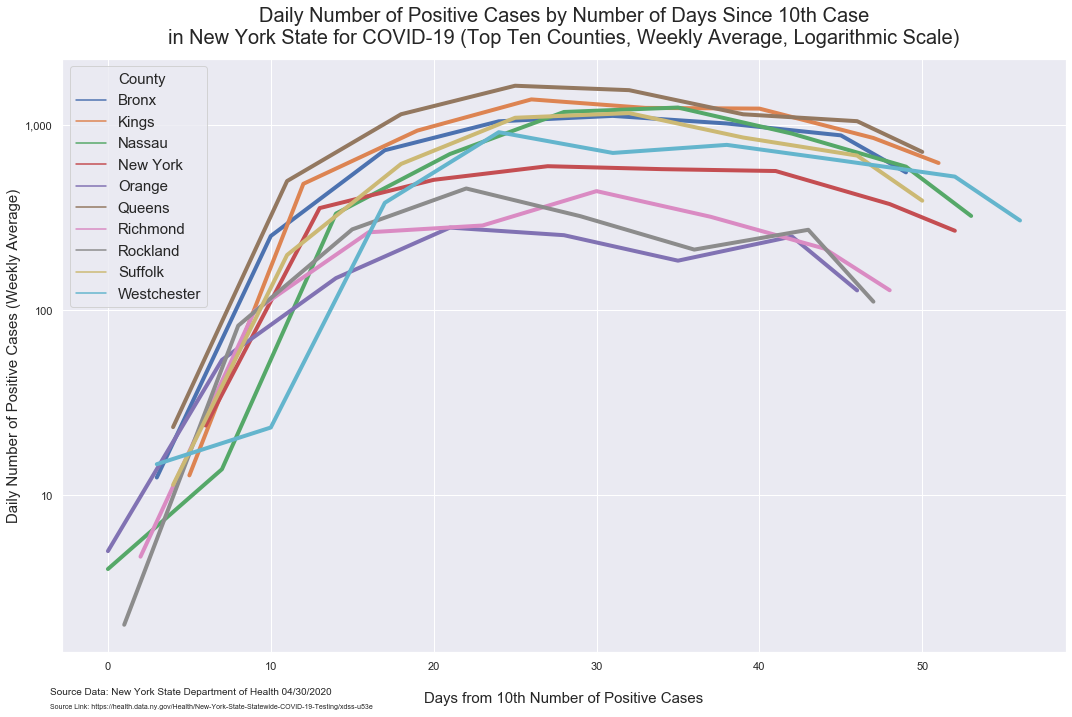

In [63]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

# Trajectory Plots

In [64]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-30       Albany             39                            1204   
1 2020-04-30     Allegany              0                              35   
2 2020-04-30        Bronx            541                           37785   
3 2020-04-30       Broome             15                             299   
4 2020-04-30  Cattaraugus              2                              49   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              378                                 10688  
1                               20                                   563  
2                             2824                                 93055  
3                              110                                  2471  
4                               78                                   987

In [65]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [66]:
nys_trajectory['daily_cases'] = nys_trajectory['Cumulative Number of Positives'].diff()

In [67]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          NaN
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [68]:
nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases < 0] = nys_trajectory['Cumulative Number of Positives']

nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases.isnull()] = nys_trajectory['Cumulative Number of Positives']

In [69]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          1.0
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [70]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'daily_cases': np.mean})

In [71]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

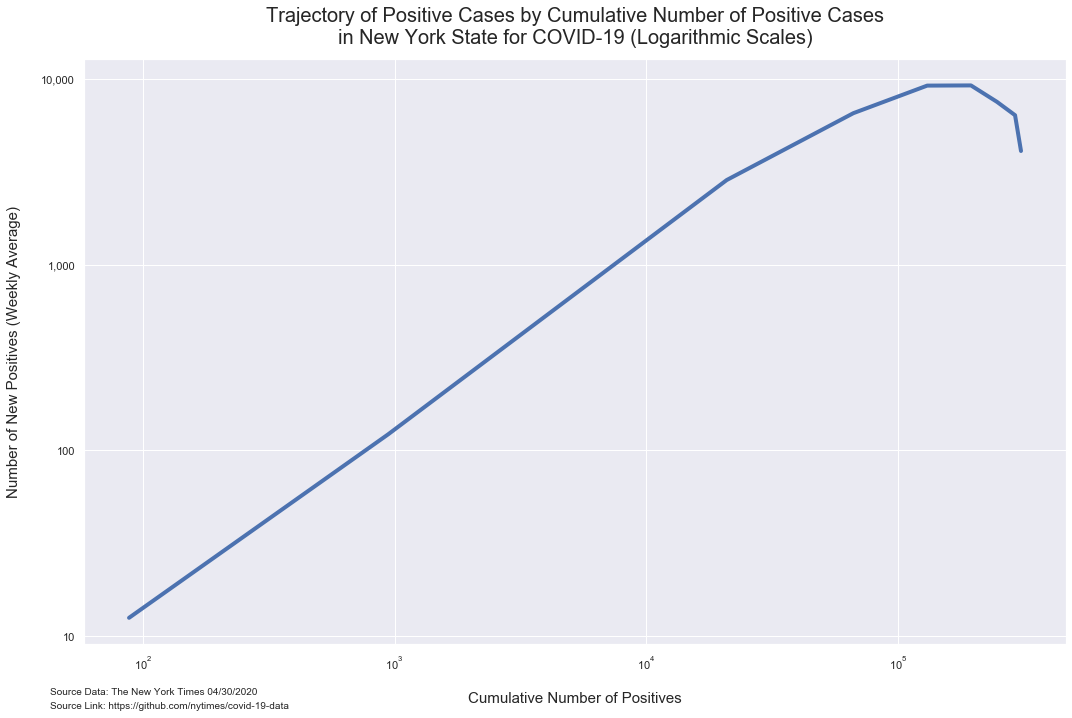

In [72]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [73]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [74]:
trajectory_plot.head()

Test Date  County  New Positives  Cumulative Number of Positives  \
3658 2020-03-02  Albany              0                               0   
3596 2020-03-03  Albany              0                               0   
3534 2020-03-04  Albany              0                               0   
3472 2020-03-05  Albany              0                               0   
3410 2020-03-06  Albany              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
3658                                0                                     0  
3596                                0                                     0  
3534                                0                                     0  
3472                                3                                     3  
3410                                0                                     3

In [75]:
trajectory_plot = trajectory_plot.loc[trajectory_plot['Cumulative Number of Positives'] > 0]

In [76]:
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                     'New Positives': np.mean})


In [77]:
trajectory_plot[:50]

Cumulative Number of Positives  New Positives
County      Test Date                                                
Albany      2020-03-15                              12       3.000000
            2020-03-22                             127      16.428571
            2020-03-29                             217      12.857143
            2020-04-05                             319      14.571429
            2020-04-12                             499      25.714286
            2020-04-19                             687      26.857143
            2020-04-26                             979      41.714286
            2020-05-03                            1204      56.250000
Allegany    2020-03-15                               2       2.000000
            2020-03-22                               2       0.000000
            2020-03-29                               7       0.714286
            2020-04-05                              17       1.428571
            2020-04-12                              26       1.285714
            2020-04-19                              30       0.571429
            2020-04-26                              35       0.714286
            2020-05-03                              35       0.000000
Bronx       2020-03-08                               1       1.000000
            2020-03-15                              57       8.000000
            2020-03-22                            1824     252.428571
            2020-03-29                            6962     734.000000
            2020-04-05                           14327    1052.142857
            2020-04-12                           22205    1125.428571
            2020-04-19                           29372    1023.857143
            2020-04-26                           35556     883.428571
            2020-05-03                           37785     557.250000
Broome      2020-03-15                               1       0.250000
            2020-03-22                               7       0.857143
            2020-03-29                              35       4.000000
            2020-04-05                              76       5.857143
            2020-04-12                             133       8.142857
            2020-04-19                             199       9.428571
            2020-04-26                             261       8.857143
            2020-05-03                             299       9.500000
Cattaraugus 2020-03-29                               6       2.000000
            2020-04-05                              12       0.857143
            2020-04-12                              28       2.285714
            2020-04-19                              34       0.857143
            2020-04-26                              45       1.571429
            2020-05-03                              49       1.000000
Cayuga      2020-03-22                               2       2.000000
            2020-03-29                               3       0.142857
            2020-04-05                              11       1.142857
            2020-04-12                              30       2.714286
            2020-04-19                              36       0.857143
            2020-04-26                              48       1.714286
            2020-05-03                              51       0.750000
Chautauqua  2020-03-29                               5       0.833333
            2020-04-05                              15       1.428571
            2020-04-12                              23       1.142857
            2020-04-19                              25       0.285714

In [78]:
trajectory_plot.reset_index(inplace=True)

trajectory_plot.rename(columns={'New Positives': 'daily_cases_week_avg'}, inplace=True)

In [79]:
trajectory_plot.head()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
0  Albany 2020-03-15                              12              3.000000
1  Albany 2020-03-22                             127             16.428571
2  Albany 2020-03-29                             217             12.857143
3  Albany 2020-04-05                             319             14.571429
4  Albany 2020-04-12                             499             25.714286

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


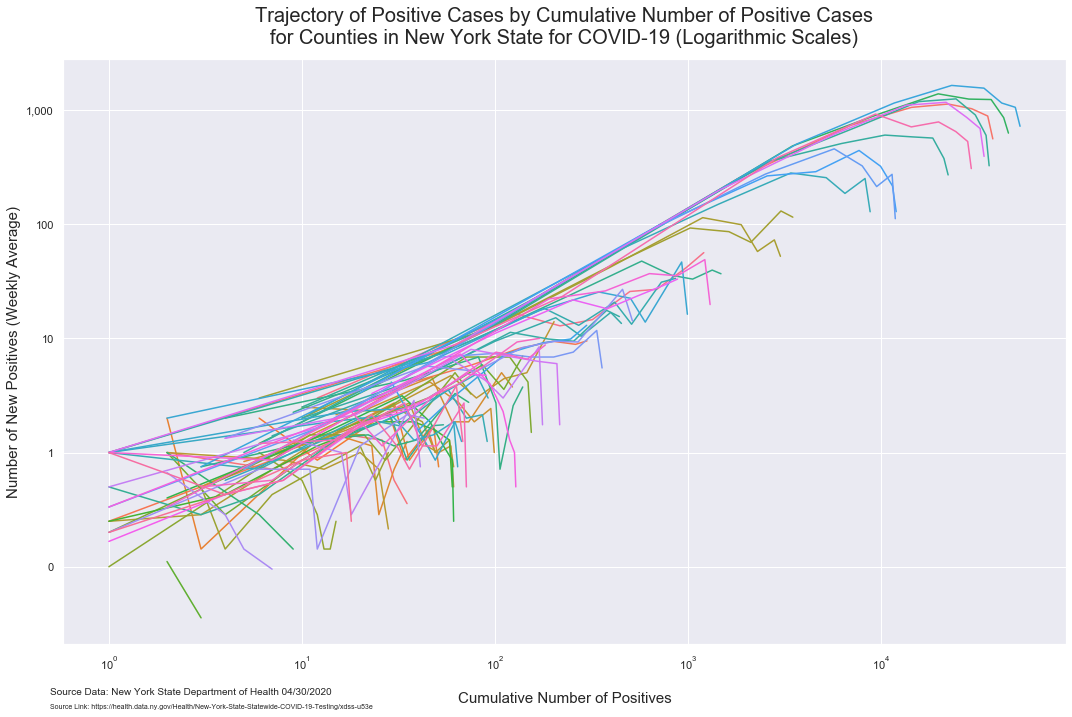

In [80]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot, ci=False)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [81]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [82]:
trajectory_plot_scatter.tail()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
57     Yates 2020-05-03                              18                  0.25
58  Franklin 2020-05-03                              15                  0.25
59     Lewis 2020-05-03                               9                  0.00
60  Schuyler 2020-05-03                               7                  0.00
61  Hamilton 2020-05-03                               3                  0.00

In [83]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Bronx', 'Nassau', 'Suffolk', 'Westchester', 'New York', 'Richmond', 'Rockland', 'Orange', 'Erie', 'Dutchess', 'Monroe', 'Ulster', 'Albany', 'Putnam', 'Sullivan', 'Onondaga', 'Schenectady', 'Oneida', 'Niagara', 'Saratoga', 'Broome', 'Rensselaer', 'Steuben', 'Columbia', 'Warren', 'St. Lawrence', 'Washington', 'Genesee', 'Greene', 'Madison', 'Tompkins', 'Chemung', 'Chenango', 'Orleans', 'Ontario', 'Tioga', 'Fulton', 'Livingston', 'Wayne', 'Wyoming', 'Otsego', 'Oswego', 'Clinton', 'Delaware', 'Jefferson', 'Herkimer', 'Montgomery', 'Cayuga', 'Cattaraugus', 'Schoharie', 'Seneca', 'Allegany', 'Chautauqua', 'Cortland', 'Essex', 'Yates', 'Franklin', 'Lewis', 'Schuyler', 'Hamilton']


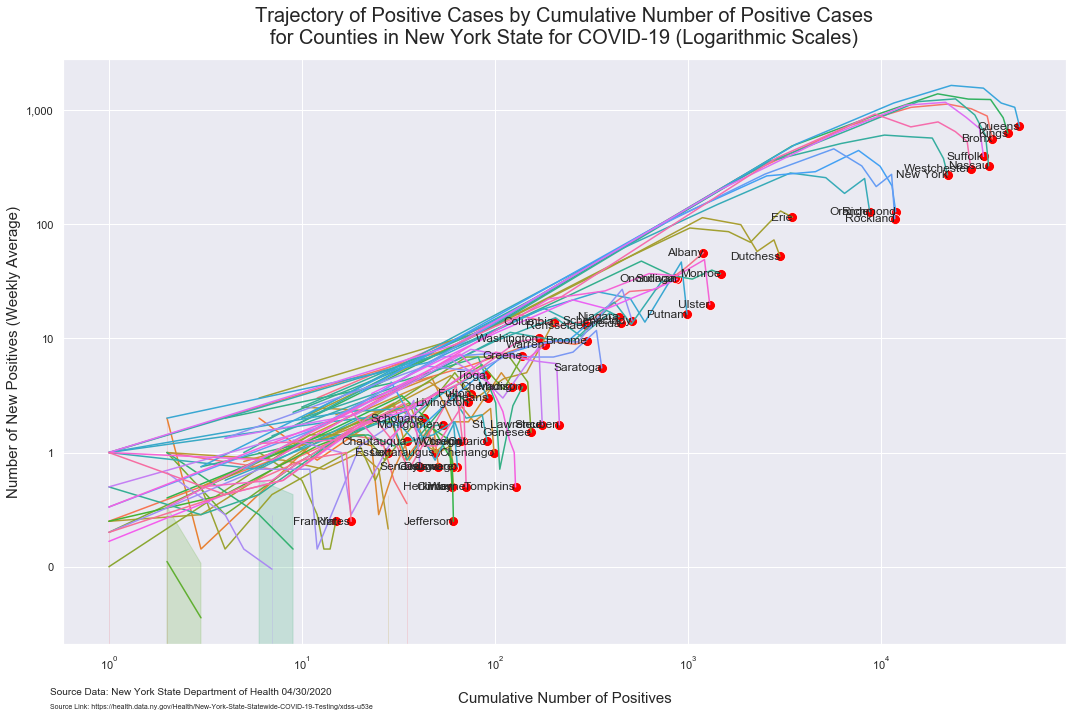

In [84]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
#plt.savefig('figures/trajectory-nys-county-log-log-scatter')

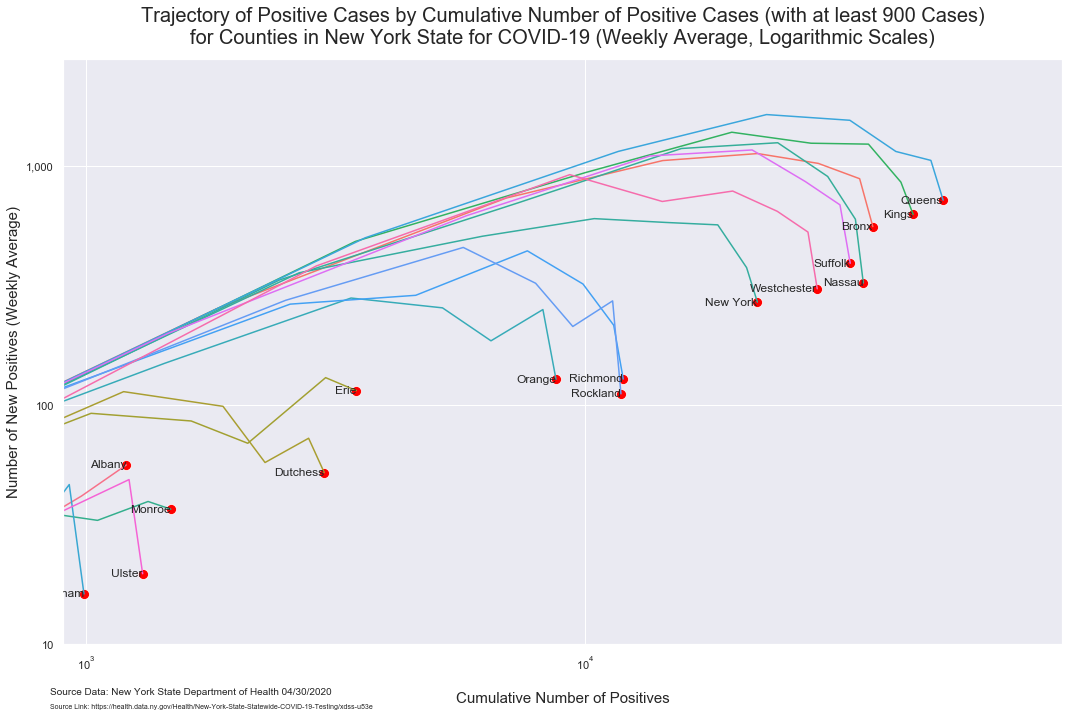

In [85]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases (with at least 900 Cases)\nfor Counties in New York State for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter-x-limit')

In [86]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

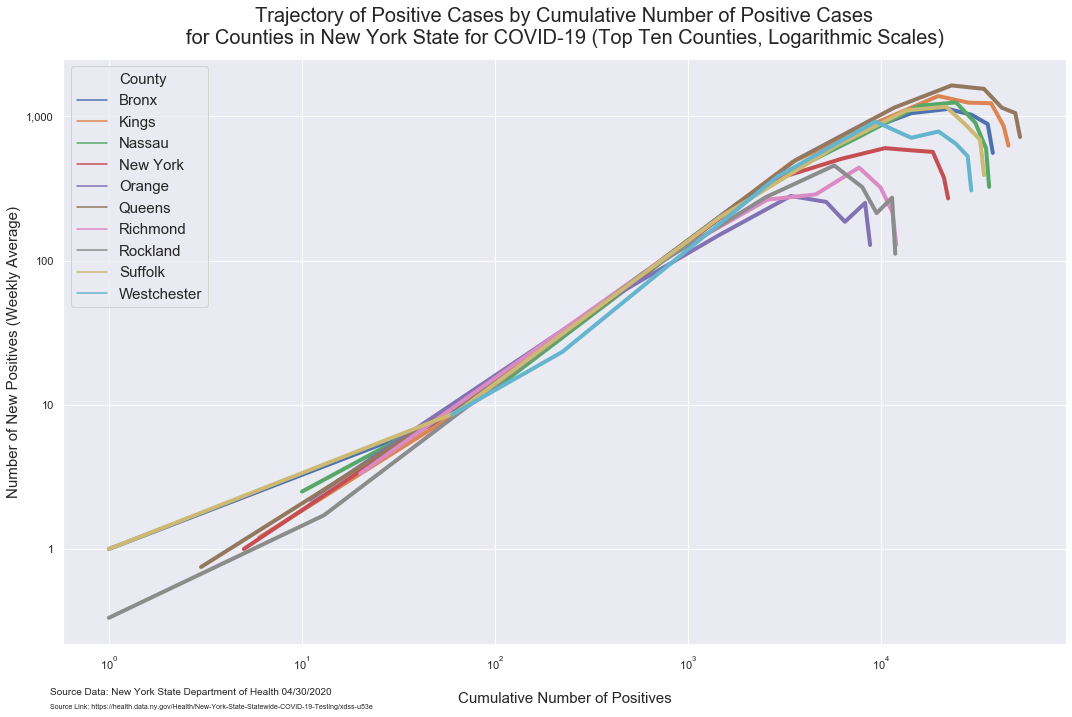

In [87]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [88]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [89]:
covid_19_nys_data_total.head(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-03-02 2020-03-02                               1
2020-03-03 2020-03-03                               1
2020-03-04 2020-03-04                               3
2020-03-05 2020-03-05                              25
2020-03-06 2020-03-06                              36
2020-03-07 2020-03-07                              60
2020-03-08 2020-03-08                              88
2020-03-09 2020-03-09                             151
2020-03-10 2020-03-10                             195
2020-03-11 2020-03-11                             251

In [90]:
covid_19_nys_data_total.tail(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-04-21 2020-04-21                          257216
2020-04-22 2020-04-22                          263460
2020-04-23 2020-04-23                          271590
2020-04-24 2020-04-24                          282143
2020-04-25 2020-04-25                          288045
2020-04-26 2020-04-26                          291996
2020-04-27 2020-04-27                          295106
2020-04-28 2020-04-28                          299691
2020-04-29 2020-04-29                          304372
2020-04-30 2020-04-30                          308314

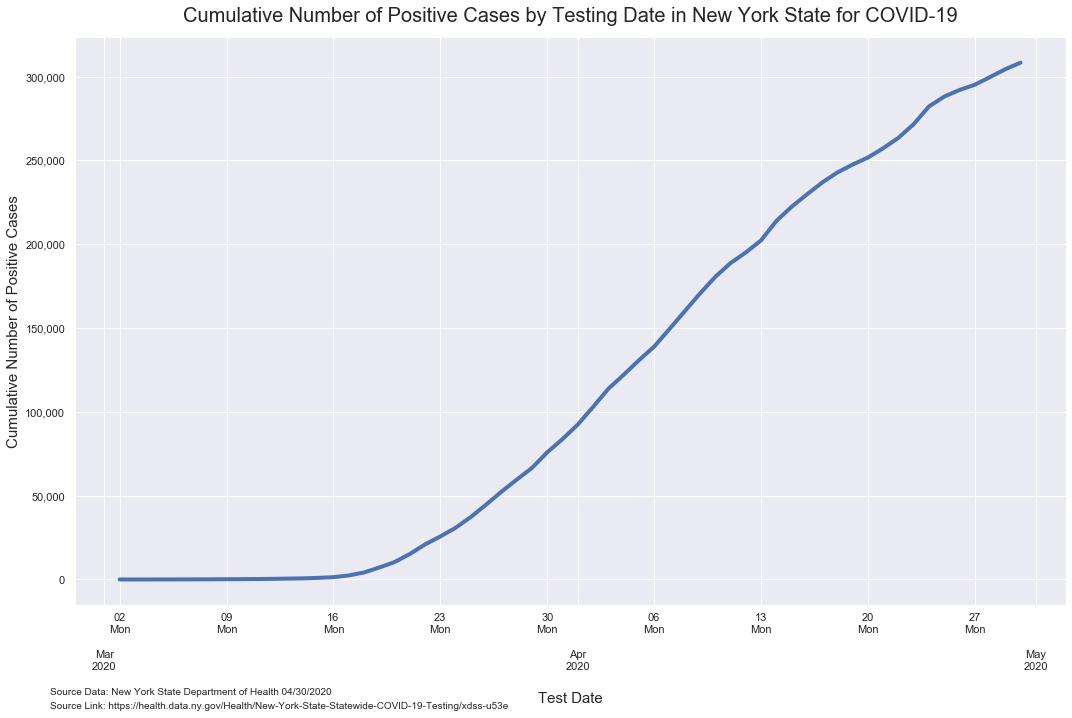

In [91]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

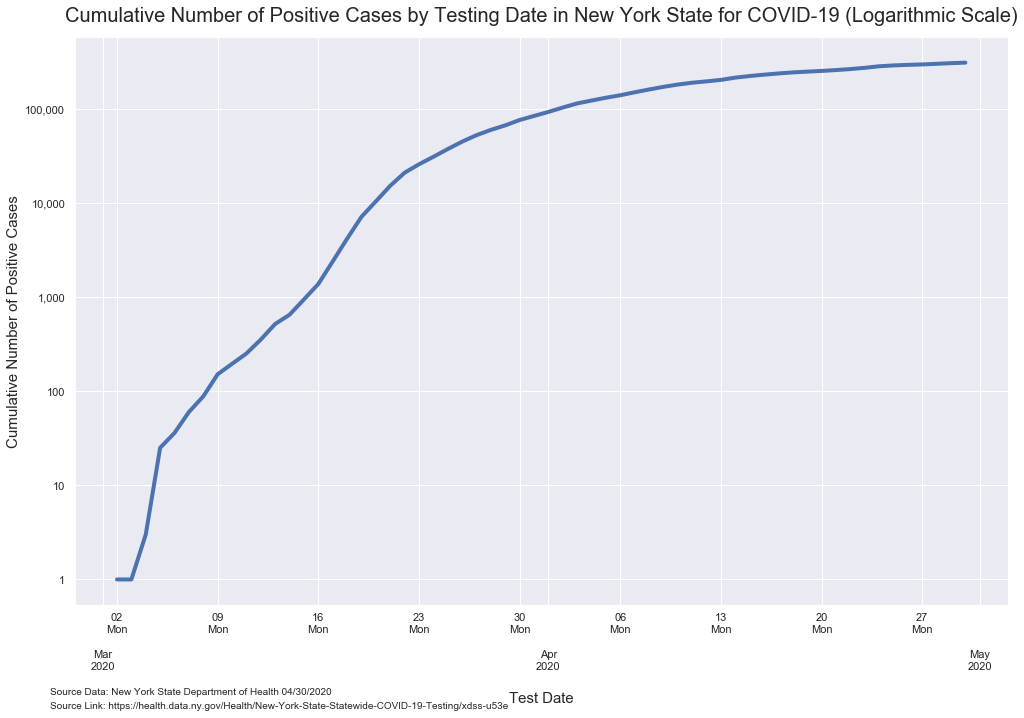

In [92]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

# Bar Plots

In [93]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [94]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

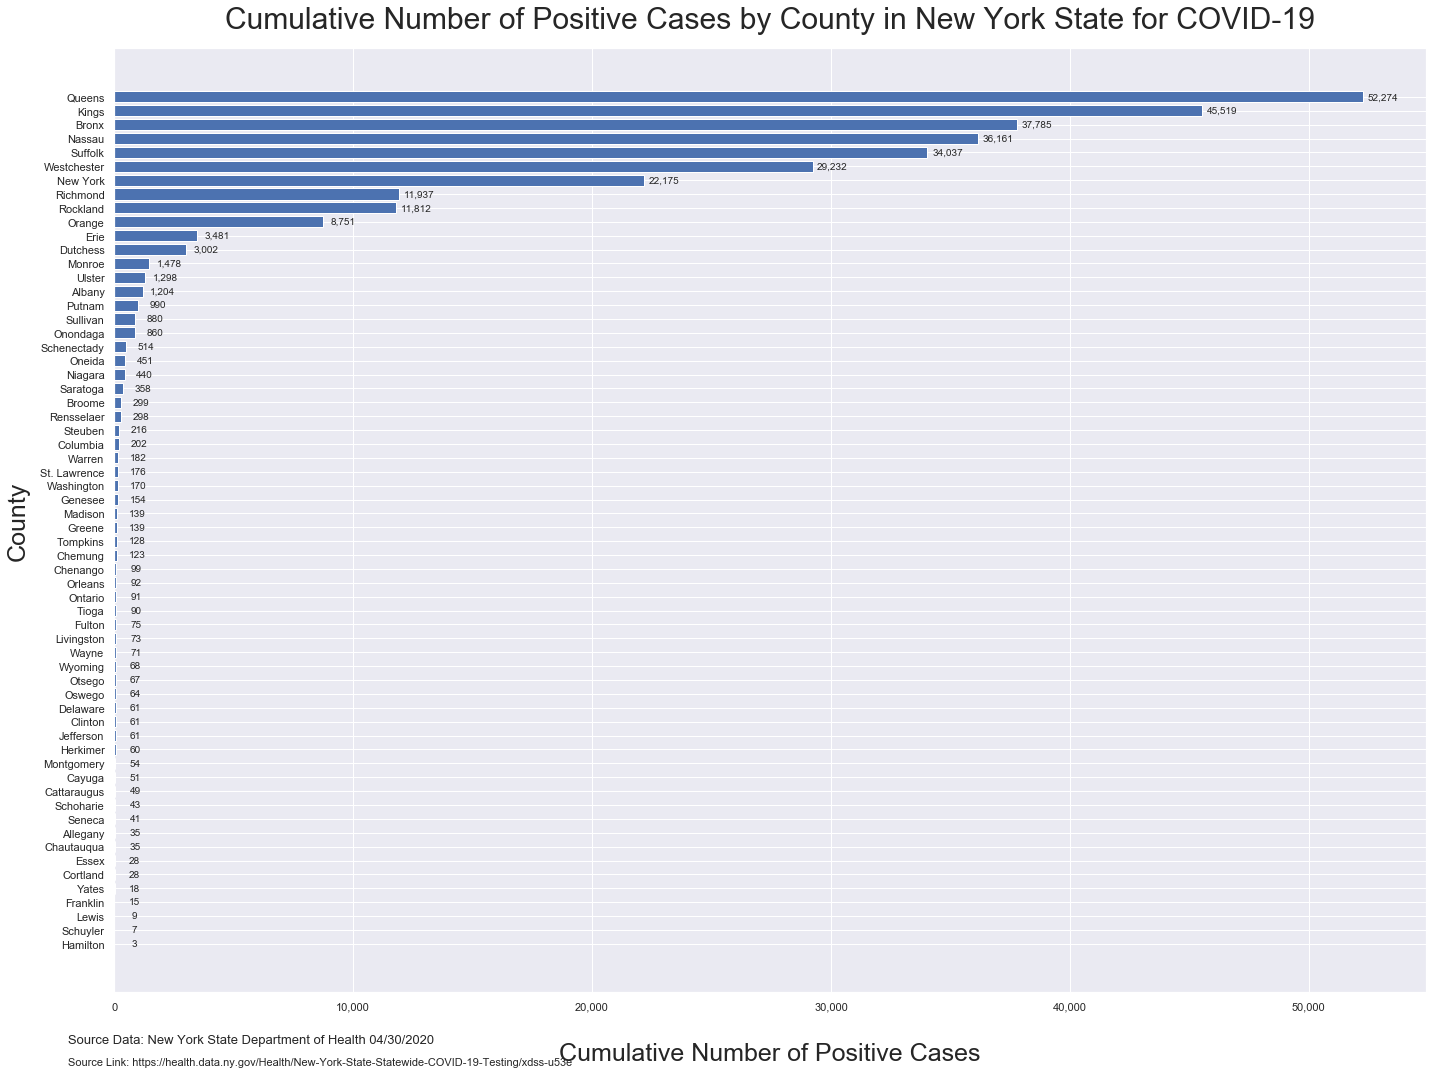

In [95]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positive Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positive Cases by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [96]:
from_ten_cases_top_10

Test Date       County  New Positives  Cumulative Number of Positives  \
120  2020-04-30        Bronx            541                           37785   
121  2020-04-29        Bronx            644                           37244   
122  2020-04-28        Bronx            606                           36600   
123  2020-04-27        Bronx            438                           35994   
124  2020-04-26        Bronx            586                           35556   
...         ...          ...            ...                             ...   
3412 2020-03-09  Westchester             42                             102   
3413 2020-03-08  Westchester             18                              60   
3414 2020-03-07  Westchester             22                              42   
3415 2020-03-06  Westchester              0                              20   
3416 2020-03-05  Westchester             19                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
120                              2824                                 93055   
121                              2977                                 90231   
122                              2938                                 87254   
123                              2107                                 84316   
124                              2363                                 82209   
...                               ...                                   ...   
3412                              222                                   592   
3413                              207                                   370   
3414                              110                                   163   
3415                                9                                    53   
3416                               42                                    44   

     ten_cases_date  days_from_10_cases  
120      2020-03-12                  49  
121      2020-03-12                  48  
122      2020-03-12                  47  
123      2020-03-12                  46  
124      2020-03-12                  45  
...             ...                 ...  
3412     2020-03-05                   4  
3413     2020-03-05                   3  
3414     2020-03-05                   2  
3415     2020-03-05                   1  
3416     2020-03-05                   0  

[512 rows x 8 columns]

In [97]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [98]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [99]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
169 2020-03-12  Bronx              3                              10   
168 2020-03-13  Bronx             10                              20   
167 2020-03-14  Bronx              8                              28   
166 2020-03-15  Bronx             29                              57   
165 2020-03-16  Bronx             29                              86   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
169                               36                                   190   
168                               99                                   289   
167                               80                                   369   
166                              116                                   485   
165                              151                                   636   

    ten_cases_date  days_from_10_cases  growth_rate  
169     2020-03-12                   0          NaN  
168     2020-03-12                   1     3.333333  
167     2020-03-12                   2     0.800000  
166     2020-03-12                   3     3.625000  
165     2020-03-12                   4     1.000000

In [100]:
growth_rate = growth_rate.loc[growth_rate.days_from_10_cases != 0]

In [101]:
growth_rate.sort_values(by='growth_rate')

Test Date       County  New Positives  Cumulative Number of Positives  \
3415 2020-03-06  Westchester              0                              20   
1985 2020-04-25       Orange            133                            8106   
2465 2020-04-25     Rockland            165                           11256   
3411 2020-03-10  Westchester              9                             111   
1730 2020-03-11     New York              3                              27   
...         ...          ...            ...                             ...   
1696 2020-04-14     New York           1737                           16617   
1729 2020-03-12     New York             18                              45   
1364 2020-03-17        Kings            264                             387   
2505 2020-03-16     Rockland              9                              22   
3414 2020-03-07  Westchester             22                              42   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
3415                                9                                    53   
1985                              643                                 24508   
2465                              677                                 28272   
3411                              177                                   769   
1730                               70                                   280   
...                               ...                                   ...   
1696                             4068                                 40517   
1729                              186                                   466   
1364                              741                                  1500   
2505                               39                                   122   
3414                              110                                   163   

     ten_cases_date  days_from_10_cases  growth_rate  
3415     2020-03-05                   1     0.000000  
1985     2020-03-15                  41     0.162592  
2465     2020-03-14                  42     0.165000  
3411     2020-03-05                   5     0.214286  
1730     2020-03-09                   2     0.250000  
...             ...                 ...          ...  
1696     2020-03-09                  36     4.583113  
1729     2020-03-09                   3     6.000000  
1364     2020-03-10                   7     6.769231  
2505     2020-03-14                   2     9.000000  
3414     2020-03-05                   2          inf  

[502 rows x 9 columns]

In [102]:
growth_rate.sort_values(by='growth_rate', ascending=False)

Test Date       County  New Positives  Cumulative Number of Positives  \
3414 2020-03-07  Westchester             22                              42   
2505 2020-03-16     Rockland              9                              22   
1364 2020-03-17        Kings            264                             387   
1729 2020-03-12     New York             18                              45   
1696 2020-04-14     New York           1737                           16617   
...         ...          ...            ...                             ...   
1730 2020-03-11     New York              3                              27   
3411 2020-03-10  Westchester              9                             111   
2465 2020-04-25     Rockland            165                           11256   
1985 2020-04-25       Orange            133                            8106   
3415 2020-03-06  Westchester              0                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
3414                              110                                   163   
2505                               39                                   122   
1364                              741                                  1500   
1729                              186                                   466   
1696                             4068                                 40517   
...                               ...                                   ...   
1730                               70                                   280   
3411                              177                                   769   
2465                              677                                 28272   
1985                              643                                 24508   
3415                                9                                    53   

     ten_cases_date  days_from_10_cases  growth_rate  
3414     2020-03-05                   2          inf  
2505     2020-03-14                   2     9.000000  
1364     2020-03-10                   7     6.769231  
1729     2020-03-09                   3     6.000000  
1696     2020-03-09                  36     4.583113  
...             ...                 ...          ...  
1730     2020-03-09                   2     0.250000  
3411     2020-03-05                   5     0.214286  
2465     2020-03-14                  42     0.165000  
1985     2020-03-15                  41     0.162592  
3415     2020-03-05                   1     0.000000  

[502 rows x 9 columns]

In [103]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [104]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [105]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [106]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
168 2020-03-13  Bronx             10                              20   
167 2020-03-14  Bronx              8                              28   
166 2020-03-15  Bronx             29                              57   
165 2020-03-16  Bronx             29                              86   
164 2020-03-17  Bronx            123                             209   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
168                               99                                   289   
167                               80                                   369   
166                              116                                   485   
165                              151                                   636   
164                              433                                  1069   

    ten_cases_date  days_from_10_cases  growth_rate  
168     2020-03-12                   1     3.333333  
167     2020-03-12                   2     0.800000  
166     2020-03-12                   3     3.625000  
165     2020-03-12                   4     1.000000  
164     2020-03-12                   5     4.241379

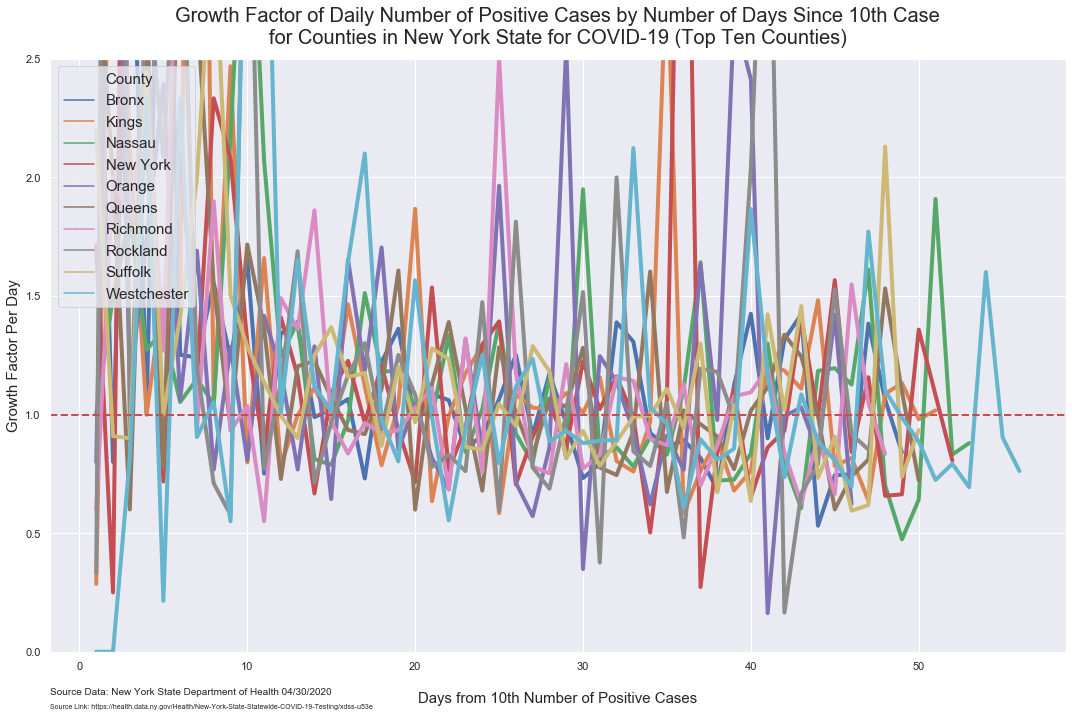

In [107]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2.5)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [108]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [109]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
            2020-04-12                  31     0.984170
...                                    ...          ...
Westchester 2020-04-05                  31     0.961829
            2020-04-12                  38     1.045997
            2020-04-19                  45     1.057481
            2020-04-26                  52     0.994165
            2020-05-03                  56     0.989808

[80 rows x 2 columns]

In [110]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [111]:
growth_rate_weekly

County  Test Date  days_from_10_cases  growth_rate_weekly_average
0         Bronx 2020-03-15                   3                    2.586111
1         Bronx 2020-03-22                  10                    1.739366
2         Bronx 2020-03-29                  17                    1.038612
3         Bronx 2020-04-05                  24                    1.067501
4         Bronx 2020-04-12                  31                    0.984170
..          ...        ...                 ...                         ...
75  Westchester 2020-04-05                  31                    0.961829
76  Westchester 2020-04-12                  38                    1.045997
77  Westchester 2020-04-19                  45                    1.057481
78  Westchester 2020-04-26                  52                    0.994165
79  Westchester 2020-05-03                  56                    0.989808

[80 rows x 4 columns]

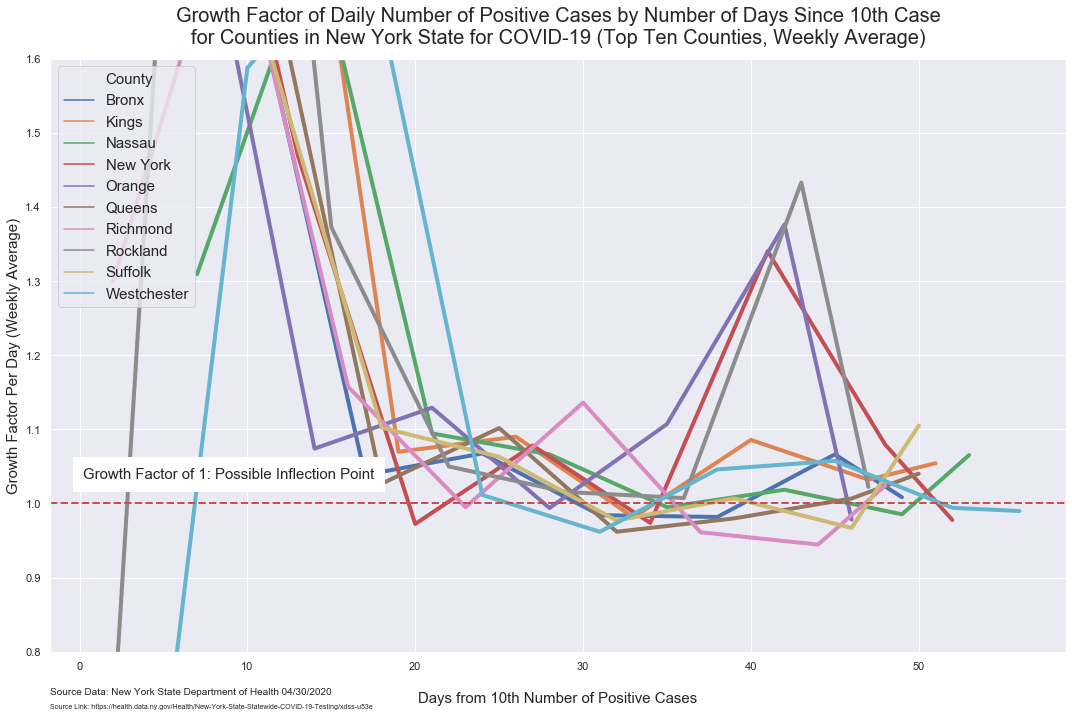

In [112]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')


sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.6)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.08, 0.33, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')

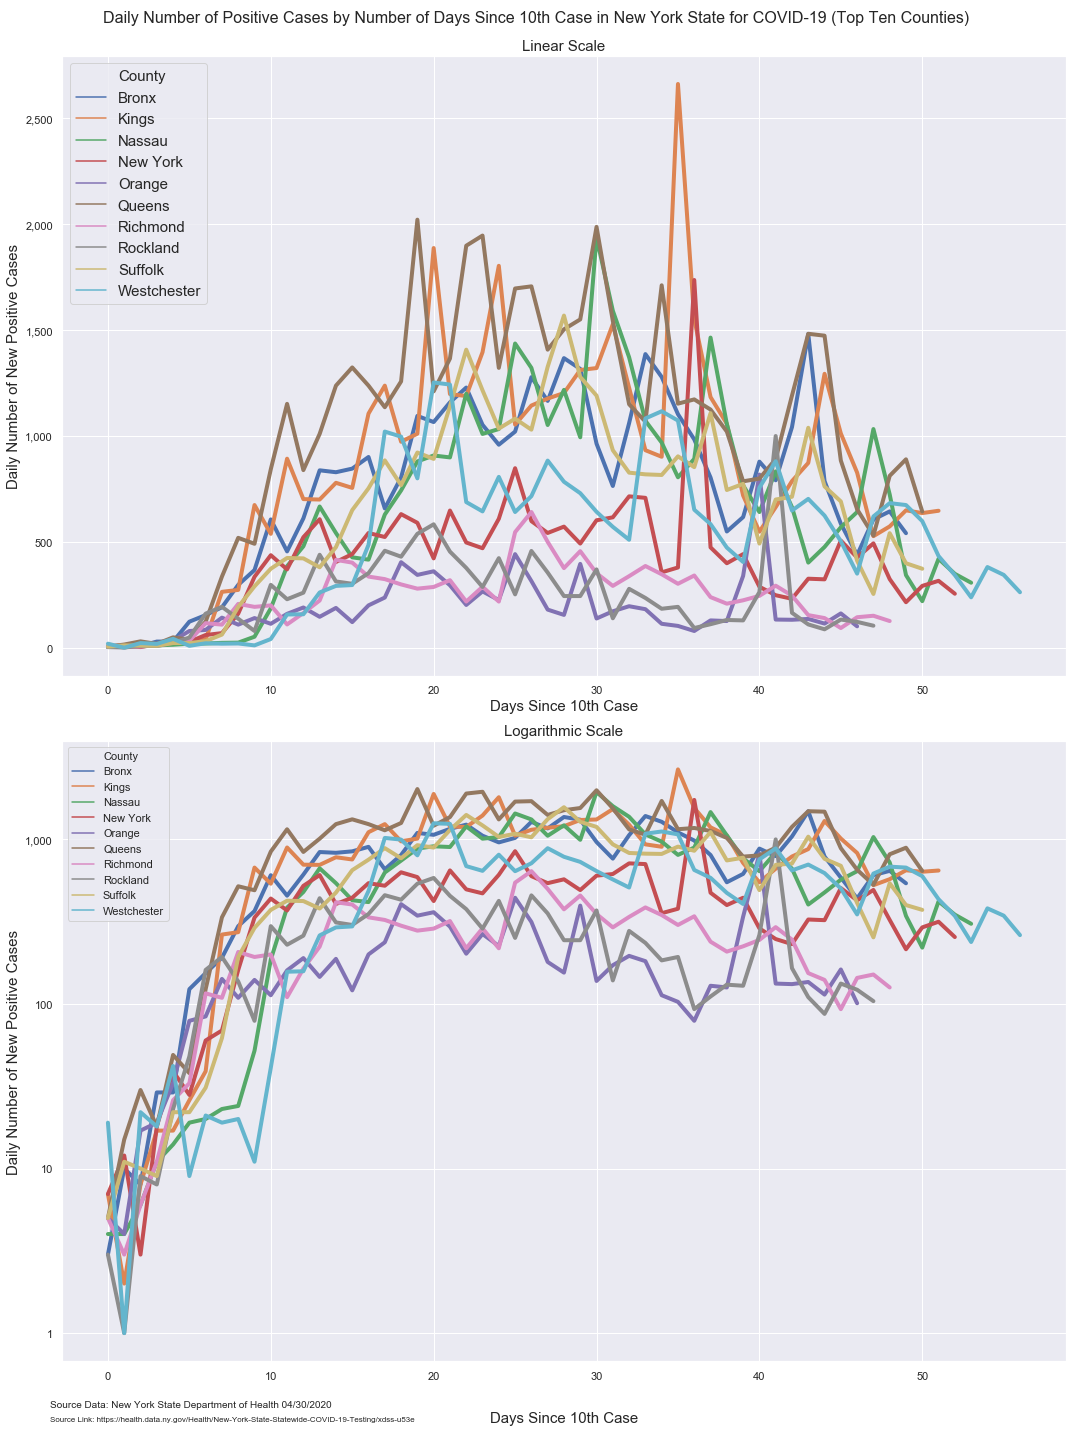

In [113]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 1
ax1 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.legend(loc='upper left', fontsize=15)


# Plot 2

ax2 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax2.set_yscale('log')

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=15)
ax2.set_title('Logarithmic Scale', fontsize=15)

# Setting Labels
ax1.set_xlabel('Days Since 10th Case', fontsize=15)
ax2.set_xlabel('Days Since 10th Case', fontsize=15, labelpad = 20)
ax1.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax2.set_ylabel('Daily Number of New Positive Cases', fontsize=15)

ax2.xaxis.labelpad = 30

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot1')

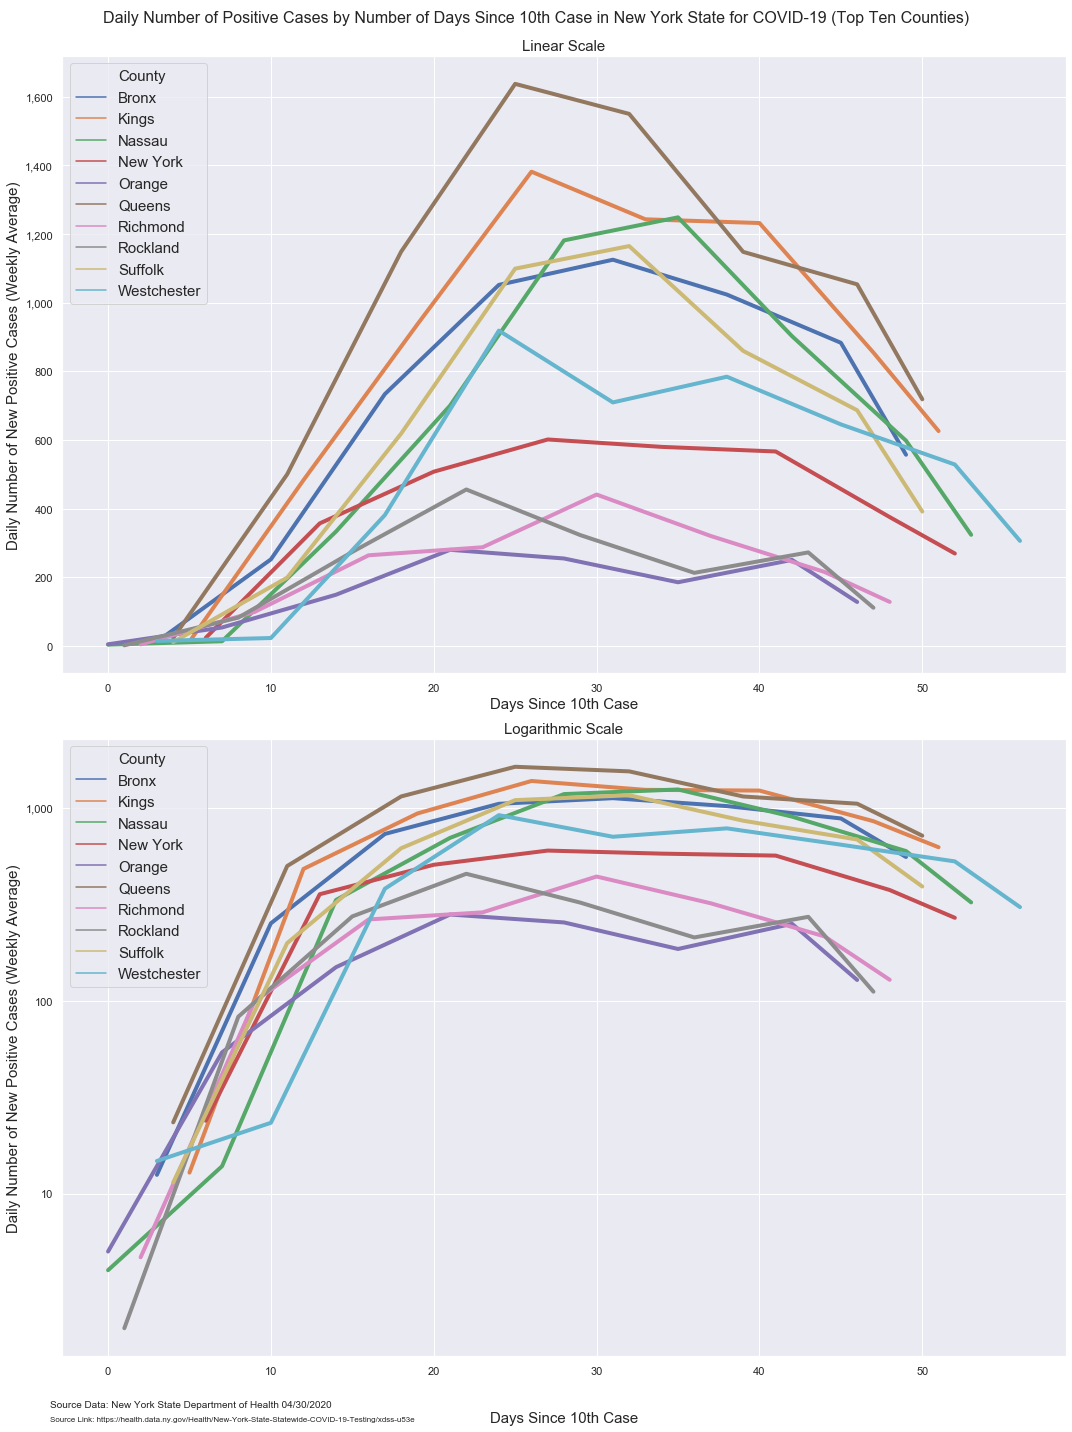

In [114]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.legend(loc='upper left', fontsize=15)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax4.set_yscale('log')

ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.legend(loc='upper left', fontsize=15)

# Setting Labels
ax3.set_xlabel('Days Since 10th Case', fontsize=15)
ax4.set_xlabel('Days Since 10th Case', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)


# Setting Titles
ax3.set_title('\n\nLinear Scale', fontsize=15)
ax4.set_title('Logarithmic Scale', fontsize=15)

ax4.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot2')

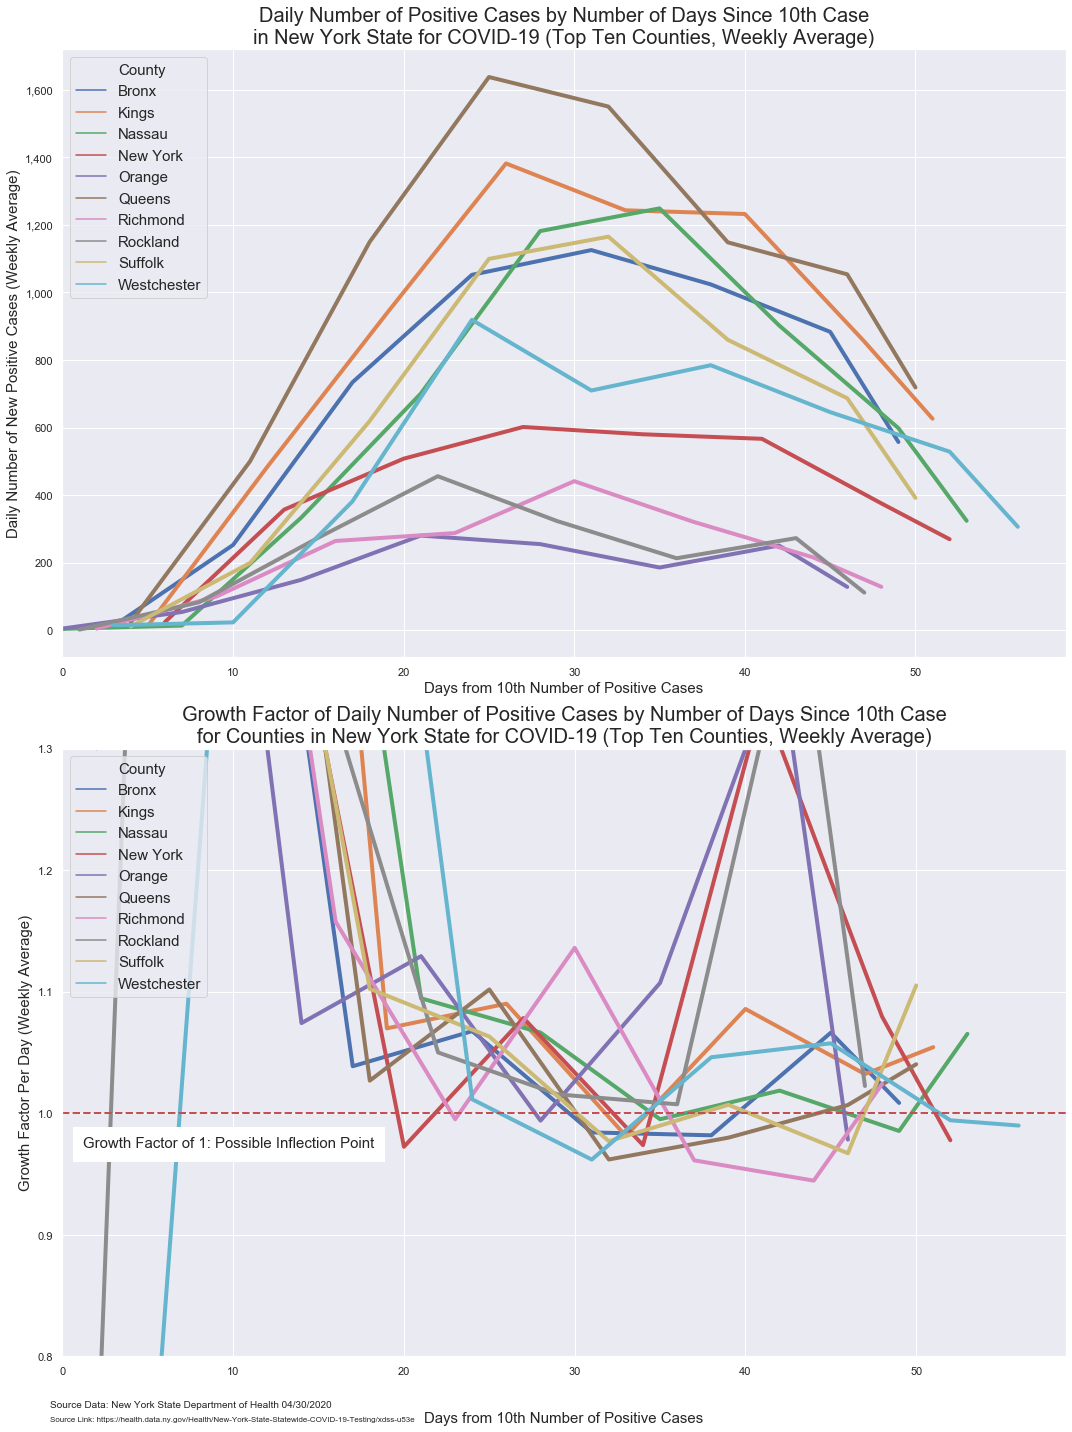

In [115]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.legend(loc='upper left', fontsize=15)
plt.xlim(0)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax4.axhline(1, color='r', lw=2, linestyle='dashed')
ax4.legend(loc='upper left', fontsize=15)
ax4.xaxis.labelpad = 20
plt.ylim(0.8, 1.3)
plt.xlim(0)

# Setting Labels
ax3.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax4.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
ax4.xaxis.labelpad = 35


# Setting Titles
ax3.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)
ax4.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot3')

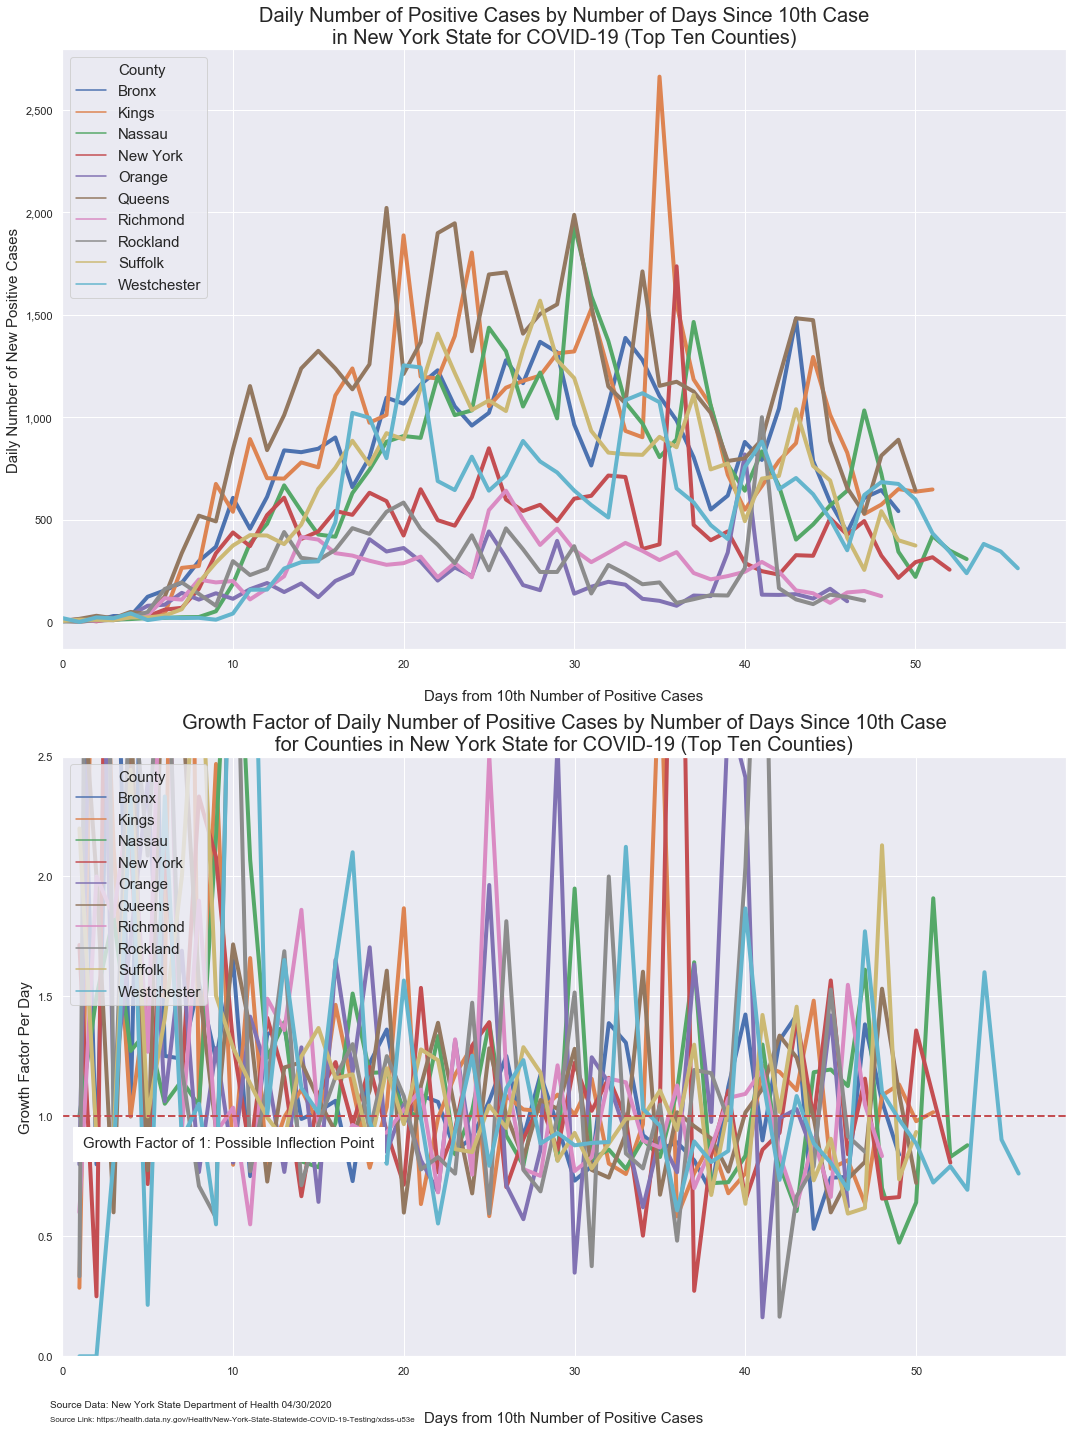

In [116]:
fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax0 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax0.xaxis.labelpad = 20
ax0.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# # Plot 4
ax1 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')
ax1.xaxis.labelpad = 20
plt.ylim(0, 2.5)
ax1.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# Setting Labels
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)


# Setting Titles
ax0.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)
ax1.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)

ax1.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))


plt.tight_layout()
plt.savefig('figures/daily_cases_subplot4')